In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import nan, inf




In [2]:
 !pip install xgboost

In [3]:
df_mean_train = pd.read_csv("../input/d/mohammednamory/latest-gp/train_3_10.csv")
df_mean_test = pd.read_csv("../input/d/mohammednamory/latest-gp/test_3_10.csv")
df_maxmin_train = pd.read_csv("../input/d/mohammednamory/latest-gp/train_mean_3_10_.csv")
df_maxmin_test = pd.read_csv("../input/d/mohammednamory/latest-gp/test_mean_3_10_.csv")

In [4]:
df_mean_test.shape

(1055, 110)

In [5]:
Field_ID = df_mean_test["Field_ID"]

In [6]:
df_mean_train.shape

(2945, 112)

In [7]:
df_mean_train.head()

,Unnamed: 0,Field_ID,Year,Quality,Yield,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,...,EVI2_9,NDVI_9,EVI_10,GDVI_10,GNDVI_10,GOSAVI_10,AVI_10,NPCRI_10,EVI2_10,NDVI_10
0,0,WZ4F1XK,2016,1,1.391,127.0,155.0,101.0,476.0,1273.0,...,0.62,0.38,-0.24,467.0,0.04,0.04,1298.19,NaN,0.04,0.04
1,1,L3XXG80,2016,2,1.391,124.0,175.0,131.0,422.0,974.0,...,0.67,0.40,2.48,1795.0,0.43,0.43,1324.54,NaN,0.76,0.43
2,2,F6TURSZ,2016,2,2.087,128.0,134.0,82.0,445.0,1043.0,...,0.81,0.43,4.55,1779.0,0.45,0.45,1352.15,NaN,0.96,0.45
3,3,BBEFUP4,2016,3,2.131,124.0,124.0,85.0,391.0,1021.0,...,0.77,0.43,4.09,1860.0,0.46,0.46,1381.73,NaN,0.92,0.46
4,4,FNOIHI2,2016,2,3.189,120.0,167.0,120.0,431.0,978.0,...,0.65,0.39,2.53,1658.0,0.40,0.40,1302.52,NaN,0.72,0.40


In [8]:
df_mean_train.shape

(2945, 112)

In [9]:
df_mean_test.shape

(1055, 110)

In [10]:
df_mean_test.head()

,Unnamed: 0,Field_ID,Year,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,...,EVI2_9,NDVI_9,EVI_10,GDVI_10,GNDVI_10,GOSAVI_10,AVI_10,NPCRI_10,EVI2_10,NDVI_10
0,0,9OUNQAM,2016,120.0,202.0,102.0,427.0,1258.0,274.0,49.0,...,0.36,0.24,5.54,1716.0,0.48,0.48,1186.50,NaN,1.00,0.48
1,1,AVGZSTD,2016,119.0,231.0,61.0,395.0,1459.0,306.0,56.0,...,0.79,0.42,10.32,2059.0,0.53,0.53,1269.22,1.0,1.26,0.53
2,2,8FT7CV7,2016,119.0,203.0,84.0,452.0,1453.0,295.0,57.0,...,0.80,0.45,2.28,1609.0,0.47,0.47,1077.02,NaN,0.80,0.47
3,3,5Y0E20F,2016,108.0,211.0,76.0,486.0,1977.0,376.0,67.0,...,0.81,0.43,6.05,1983.0,0.52,0.52,1421.43,NaN,1.12,0.52
4,4,MWHKL3P,2016,117.0,245.0,78.0,417.0,1230.0,291.0,57.0,...,0.84,0.42,7.44,1665.0,0.48,0.48,1087.98,NaN,1.01,0.48


In [11]:
df_mean_train.drop(columns={'Unnamed: 0', "Field_ID"}, inplace= True)
df_mean_test.drop(columns={'Unnamed: 0',"Field_ID"}, inplace= True)


In [12]:
df_maxmin_train.drop(columns={'Unnamed: 0', "Field_ID"}, inplace= True)
df_maxmin_test.drop(columns={'Unnamed: 0',"Field_ID"}, inplace= True)

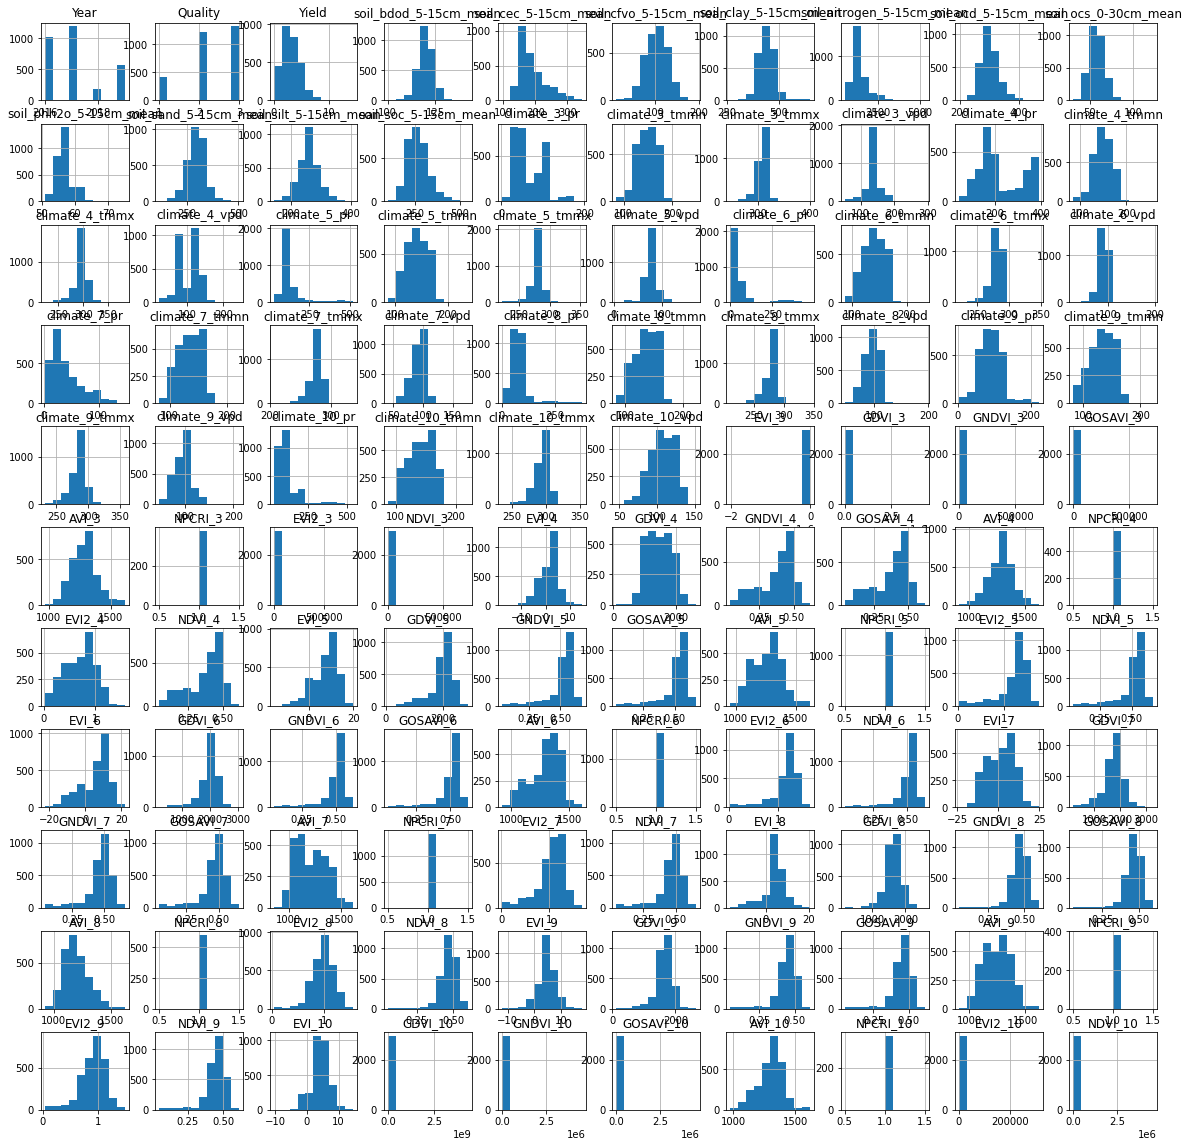

In [13]:
df_mean_train.hist(figsize=(20,20));

# Data Preparation

In [14]:
df_maxmin_train['GDVI_mean']=df_mean_train[['GDVI_3','GDVI_4','GDVI_5','GDVI_6','GDVI_7','GDVI_8','GDVI_9',"GDVI_10"]].mean(axis=1)
df_maxmin_test['GDVI_mean']=df_mean_test[['GDVI_3','GDVI_4','GDVI_5','GDVI_6','GDVI_7','GDVI_8','GDVI_9',"GDVI_10"]].mean(axis=1)

df_maxmin_train['GNDVI_mean']=df_mean_train[['GNDVI_3','GNDVI_4','GNDVI_5','GNDVI_6','GNDVI_7','GNDVI_8','GNDVI_9',"GNDVI_10"]].mean(axis=1)
df_maxmin_test['GNDVI_mean']=df_mean_test[['GNDVI_3','GNDVI_4','GNDVI_5','GNDVI_6','GNDVI_7','GNDVI_8','GNDVI_9',"GNDVI_10"]].mean(axis=1)

df_maxmin_train['GOSAVI_mean']=df_mean_train[['GOSAVI_3','GOSAVI_4','GOSAVI_5','GOSAVI_6','GOSAVI_7','GOSAVI_8','GOSAVI_9',"GOSAVI_10"]].mean(axis=1)
df_maxmin_test['GOSAVI_mean']=df_mean_test[['GOSAVI_3','GOSAVI_4','GOSAVI_5','GOSAVI_6','GOSAVI_7','GOSAVI_8','GOSAVI_9',"GOSAVI_10"]].mean(axis=1)

df_maxmin_train['EVI_mean']=df_mean_train[['EVI_3','EVI_4','EVI_5','EVI_6','EVI_7','EVI_8','EVI_9',"EVI_10"]].mean(axis=1)
df_maxmin_test['EVI_mean']=df_mean_test[['EVI_3','EVI_4','EVI_5','EVI_6','EVI_7','EVI_8','EVI_9',"EVI_10"]].mean(axis=1)

df_maxmin_train['AVI_mean']=df_mean_train[['AVI_3','AVI_4','AVI_5','AVI_6','AVI_7','AVI_8','AVI_9',"AVI_10"]].mean(axis=1)
df_maxmin_test['AVI_mean']=df_mean_test[['AVI_3','AVI_4','AVI_5','AVI_6','AVI_7','AVI_8','AVI_9',"AVI_10"]].mean(axis=1)

df_maxmin_train['EVI2_mean']=df_mean_train[['EVI2_3','EVI2_4','EVI2_5','EVI2_6','EVI2_7','EVI2_8','EVI2_9',"EVI2_10"]].mean(axis=1)
df_maxmin_test['EVI2_mean']=df_mean_test[['EVI2_3','EVI2_4','EVI2_5','EVI2_6','EVI2_7','EVI2_8','EVI2_9',"EVI2_10"]].mean(axis=1)

df_maxmin_train['NDVI_mean']=df_mean_train[['NDVI_3','NDVI_4','NDVI_5','NDVI_6','NDVI_7','NDVI_8','NDVI_9',"NDVI_10"]].mean(axis=1)
df_maxmin_test['NDVI_mean']=df_mean_test[['NDVI_3','NDVI_4','NDVI_5','NDVI_6','NDVI_7','NDVI_8','NDVI_9',"NDVI_10"]].mean(axis=1)

In [15]:
df_maxmin_train['GDVI_std']=df_mean_train[['GDVI_3','GDVI_4','GDVI_5','GDVI_6','GDVI_7','GDVI_8','GDVI_9',"GDVI_10"]].std(axis=1)
df_maxmin_test['GDVI_std']=df_mean_test[['GDVI_3','GDVI_4','GDVI_5','GDVI_6','GDVI_7','GDVI_8','GDVI_9',"GDVI_10"]].std(axis=1)

df_maxmin_train['GNDVI_std']=df_mean_train[['GNDVI_3','GNDVI_4','GNDVI_5','GNDVI_6','GNDVI_7','GNDVI_8','GNDVI_9',"GNDVI_10"]].std(axis=1)
df_maxmin_test['GNDVI_std']=df_mean_test[['GNDVI_3','GNDVI_4','GNDVI_5','GNDVI_6','GNDVI_7','GNDVI_8','GNDVI_9',"GNDVI_10"]].std(axis=1)

df_maxmin_train['GOSAVI_std']=df_mean_train[['GOSAVI_3','GOSAVI_4','GOSAVI_5','GOSAVI_6','GOSAVI_7','GOSAVI_8','GOSAVI_9',"GOSAVI_10"]].std(axis=1)
df_maxmin_test['GOSAVI_std']=df_mean_test[['GOSAVI_3','GOSAVI_4','GOSAVI_5','GOSAVI_6','GOSAVI_7','GOSAVI_8','GOSAVI_9',"GOSAVI_10"]].std(axis=1)

df_maxmin_train['EVI_std']=df_mean_train[['EVI_3','EVI_4','EVI_5','EVI_6','EVI_7','EVI_8','EVI_9',"EVI_10"]].std(axis=1)
df_maxmin_test['EVI_std']=df_mean_test[['EVI_3','EVI_4','EVI_5','EVI_6','EVI_7','EVI_8','EVI_9',"EVI_10"]].std(axis=1)

df_maxmin_train['AVI_std']=df_mean_train[['AVI_3','AVI_4','AVI_5','AVI_6','AVI_7','AVI_8','AVI_9',"AVI_10"]].std(axis=1)
df_maxmin_test['AVI_std']=df_mean_test[['AVI_3','AVI_4','AVI_5','AVI_6','AVI_7','AVI_8','AVI_9',"AVI_10"]].std(axis=1)


df_maxmin_train['EVI2_std']=df_mean_train[['EVI2_3','EVI2_4','EVI2_5','EVI2_6','EVI2_7','EVI2_8','EVI2_9',"EVI2_10"]].std(axis=1)
df_maxmin_test['EVI2_std']=df_mean_test[['EVI2_3','EVI2_4','EVI2_5','EVI2_6','EVI2_7','EVI2_8','EVI2_9',"EVI2_10"]].std(axis=1)

df_maxmin_train['NDVI_std']=df_mean_train[['NDVI_3','NDVI_4','NDVI_5','NDVI_6','NDVI_7','NDVI_8','NDVI_9',"NDVI_10"]].std(axis=1)
df_maxmin_test['NDVI_std']=df_mean_test[['NDVI_3','NDVI_4','NDVI_5','NDVI_6','NDVI_7','NDVI_8','NDVI_9',"NDVI_10"]].std(axis=1)

In [16]:
df_maxmin_train['GDVI_median']=df_mean_train[['GDVI_3','GDVI_4','GDVI_5','GDVI_6','GDVI_7','GDVI_8','GDVI_9',"GDVI_10"]].median(axis=1)
df_maxmin_test['GDVI_median']=df_mean_test[['GDVI_3','GDVI_4','GDVI_5','GDVI_6','GDVI_7','GDVI_8','GDVI_9',"GDVI_10"]].median(axis=1)

df_maxmin_train['GNDVI_median']=df_mean_train[['GNDVI_3','GNDVI_4','GNDVI_5','GNDVI_6','GNDVI_7','GNDVI_8','GNDVI_9',"GNDVI_10"]].median(axis=1)
df_maxmin_test['GNDVI_median']=df_mean_test[['GNDVI_3','GNDVI_4','GNDVI_5','GNDVI_6','GNDVI_7','GNDVI_8','GNDVI_9',"GNDVI_10"]].median(axis=1)

df_maxmin_train['GOSAVI_median']=df_mean_train[['GOSAVI_3','GOSAVI_4','GOSAVI_5','GOSAVI_6','GOSAVI_7','GOSAVI_8','GOSAVI_9',"GOSAVI_10"]].median(axis=1)
df_maxmin_test['GOSAVI_median']=df_mean_test[['GOSAVI_3','GOSAVI_4','GOSAVI_5','GOSAVI_6','GOSAVI_7','GOSAVI_8','GOSAVI_9',"GOSAVI_10"]].median(axis=1)

df_maxmin_train['EVI_median']=df_mean_train[['EVI_3','EVI_4','EVI_5','EVI_6','EVI_7','EVI_8','EVI_9',"EVI_10"]].median(axis=1)
df_maxmin_test['EVI_median']=df_mean_test[['EVI_3','EVI_4','EVI_5','EVI_6','EVI_7','EVI_8','EVI_9',"EVI_10"]].median(axis=1)

df_maxmin_train['AVI_median']=df_mean_train[['AVI_3','AVI_4','AVI_5','AVI_6','AVI_7','AVI_8','AVI_9',"AVI_10"]].median(axis=1)
df_maxmin_test['AVI_median']=df_mean_test[['AVI_3','AVI_4','AVI_5','AVI_6','AVI_7','AVI_8','AVI_9',"AVI_10"]].median(axis=1)

df_maxmin_train['EVI2_median']=df_mean_train[['EVI2_3','EVI2_4','EVI2_5','EVI2_6','EVI2_7','EVI2_8','EVI2_9',"EVI2_10"]].median(axis=1)
df_maxmin_test['EVI2_median']=df_mean_test[['EVI2_3','EVI2_4','EVI2_5','EVI2_6','EVI2_7','EVI2_8','EVI2_9',"EVI2_10"]].median(axis=1)

df_maxmin_train['NDVI_median']=df_mean_train[['NDVI_3','NDVI_4','NDVI_5','NDVI_6','NDVI_7','NDVI_8','NDVI_9',"NDVI_10"]].median(axis=1)
df_maxmin_test['NDVI_median']=df_mean_test[['NDVI_3','NDVI_4','NDVI_5','NDVI_6','NDVI_7','NDVI_8','NDVI_9',"NDVI_10"]].median(axis=1)

In [17]:
df_maxmin_train.head()

,Year,Quality,Yield,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,...,AVI_std,EVI2_std,NDVI_std,GDVI_median,GNDVI_median,GOSAVI_median,EVI_median,AVI_median,EVI2_median,NDVI_median
0,2016,1,1.391,127.0,155.0,101.0,476.0,1273.0,292.0,54.0,...,48.324752,0.327411,0.157639,1218.5,0.335,0.335,1.565,1304.355,0.50,0.335
1,2016,2,1.391,124.0,175.0,131.0,422.0,974.0,280.0,58.0,...,112.782694,0.259447,0.140706,1494.5,0.385,0.385,2.290,1286.305,0.65,0.385
2,2016,2,2.087,128.0,134.0,82.0,445.0,1043.0,285.0,52.0,...,146.978727,0.297703,0.103199,1561.0,0.435,0.435,3.550,1377.495,0.85,0.435
3,2016,3,2.131,124.0,124.0,85.0,391.0,1021.0,257.0,41.0,...,98.470389,0.277476,0.077414,1574.5,0.430,0.430,2.575,1326.600,0.84,0.430
4,2016,2,3.189,120.0,167.0,120.0,431.0,978.0,287.0,62.0,...,44.056560,0.228395,0.114946,1432.5,0.390,0.390,2.545,1310.955,0.67,0.390


In [18]:
df_maxmin_test.head()

,Year,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,soil_sand_5-15cm_mean,...,AVI_std,EVI2_std,NDVI_std,GDVI_median,GNDVI_median,GOSAVI_median,EVI_median,AVI_median,EVI2_median,NDVI_median
0,2016,120.0,202.0,102.0,427.0,1258.0,274.0,49.0,56.0,306.0,...,112.997048,0.455122,0.171527,1683.5,0.470,0.470,4.355,1237.900,1.015,0.470
1,2016,119.0,231.0,61.0,395.0,1459.0,306.0,56.0,55.0,283.0,...,84.474612,0.288630,0.080490,1761.5,0.440,0.440,4.945,1260.560,0.875,0.440
2,2016,119.0,203.0,84.0,452.0,1453.0,295.0,57.0,55.0,285.0,...,114.794550,0.187464,0.040267,1681.5,0.465,0.465,5.095,1244.980,0.900,0.465
3,2016,108.0,211.0,76.0,486.0,1977.0,376.0,67.0,54.0,217.0,...,99.566263,0.444578,0.171860,1703.0,0.495,0.495,6.550,1285.565,1.095,0.495
4,2016,117.0,245.0,78.0,417.0,1230.0,291.0,57.0,56.0,283.0,...,153.845627,0.241509,0.092582,1522.5,0.435,0.435,5.690,1289.390,0.955,0.435


In [19]:
X_train = df_maxmin_train.drop(columns={"Yield","Year","Quality"}, axis = 0)
y = df_maxmin_train["Yield"]
X_test = df_maxmin_test.drop(columns=["Year"])

In [20]:
X_train.head()

,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,soil_sand_5-15cm_mean,soil_silt_5-15cm_mean,...,AVI_std,EVI2_std,NDVI_std,GDVI_median,GNDVI_median,GOSAVI_median,EVI_median,AVI_median,EVI2_median,NDVI_median
0,127.0,155.0,101.0,476.0,1273.0,292.0,54.0,53.0,328.0,196.0,...,48.324752,0.327411,0.157639,1218.5,0.335,0.335,1.565,1304.355,0.50,0.335
1,124.0,175.0,131.0,422.0,974.0,280.0,58.0,55.0,310.0,267.0,...,112.782694,0.259447,0.140706,1494.5,0.385,0.385,2.290,1286.305,0.65,0.385
2,128.0,134.0,82.0,445.0,1043.0,285.0,52.0,57.0,342.0,214.0,...,146.978727,0.297703,0.103199,1561.0,0.435,0.435,3.550,1377.495,0.85,0.435
3,124.0,124.0,85.0,391.0,1021.0,257.0,41.0,54.0,368.0,241.0,...,98.470389,0.277476,0.077414,1574.5,0.430,0.430,2.575,1326.600,0.84,0.430
4,120.0,167.0,120.0,431.0,978.0,287.0,62.0,54.0,310.0,259.0,...,44.056560,0.228395,0.114946,1432.5,0.390,0.390,2.545,1310.955,0.67,0.390


In [21]:
X_test.head()

,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,soil_sand_5-15cm_mean,soil_silt_5-15cm_mean,...,AVI_std,EVI2_std,NDVI_std,GDVI_median,GNDVI_median,GOSAVI_median,EVI_median,AVI_median,EVI2_median,NDVI_median
0,120.0,202.0,102.0,427.0,1258.0,274.0,49.0,56.0,306.0,267.0,...,112.997048,0.455122,0.171527,1683.5,0.470,0.470,4.355,1237.900,1.015,0.470
1,119.0,231.0,61.0,395.0,1459.0,306.0,56.0,55.0,283.0,322.0,...,84.474612,0.288630,0.080490,1761.5,0.440,0.440,4.945,1260.560,0.875,0.440
2,119.0,203.0,84.0,452.0,1453.0,295.0,57.0,55.0,285.0,264.0,...,114.794550,0.187464,0.040267,1681.5,0.465,0.465,5.095,1244.980,0.900,0.465
3,108.0,211.0,76.0,486.0,1977.0,376.0,67.0,54.0,217.0,297.0,...,99.566263,0.444578,0.171860,1703.0,0.495,0.495,6.550,1285.565,1.095,0.495
4,117.0,245.0,78.0,417.0,1230.0,291.0,57.0,56.0,283.0,299.0,...,153.845627,0.241509,0.092582,1522.5,0.435,0.435,5.690,1289.390,0.955,0.435


# Exploratory Data Analysis

In [22]:
cols = X_train.columns

In [23]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [24]:
initial_eda(X_train)

Dimensions : 2945 rows, 88 columns
Total NA Values : 17436 
                           Column Name  Data Type      #Distinct  NA Values
                 soil_bdod_5-15cm_mean    float64           32          0
                  soil_cec_5-15cm_mean    float64          204          0
                 soil_cfvo_5-15cm_mean    float64          145          0
                 soil_clay_5-15cm_mean    float64          219          0
             soil_nitrogen_5-15cm_mean    float64         1164          0
                  soil_ocd_5-15cm_mean    float64          185          0
                  soil_ocs_0-30cm_mean    float64           62          0
                soil_phh2o_5-15cm_mean    float64           16          0
                 soil_sand_5-15cm_mean    float64          255          0
                 soil_silt_5-15cm_mean    float64          195          0
                  soil_soc_5-15cm_mean    float64          306          0
                                 AVI_3    float64 

In [25]:
initial_eda(X_test)

Dimensions : 1055 rows, 88 columns
Total NA Values : 6234 
                           Column Name  Data Type      #Distinct  NA Values
                 soil_bdod_5-15cm_mean    float64           37          5
                  soil_cec_5-15cm_mean    float64          134          5
                 soil_cfvo_5-15cm_mean    float64          128          5
                 soil_clay_5-15cm_mean    float64          181          5
             soil_nitrogen_5-15cm_mean    float64          704          5
                  soil_ocd_5-15cm_mean    float64          219          5
                  soil_ocs_0-30cm_mean    float64           84          5
                soil_phh2o_5-15cm_mean    float64           16          5
                 soil_sand_5-15cm_mean    float64          254          5
                 soil_silt_5-15cm_mean    float64          231          5
                  soil_soc_5-15cm_mean    float64          298          5
                                 AVI_3    float64  

In [26]:
X_train.drop(columns={'NPCRI_max', "NPCRI_min","NPCRI_10","NPCRI_9","NPCRI_8","NPCRI_7","NPCRI_6","NPCRI_5","NPCRI_4","NPCRI_3"}, inplace= True)
X_test.drop(columns={'NPCRI_max', "NPCRI_min","NPCRI_10","NPCRI_9","NPCRI_8","NPCRI_7","NPCRI_6","NPCRI_5","NPCRI_4","NPCRI_3"}, inplace= True)

In [27]:
X_train.fillna(X_train.mean(),inplace = True)
X_test.fillna(X_test.mean(),inplace = True)

In [28]:
df_mean_train["Yield"].mean()

3.168022495755512

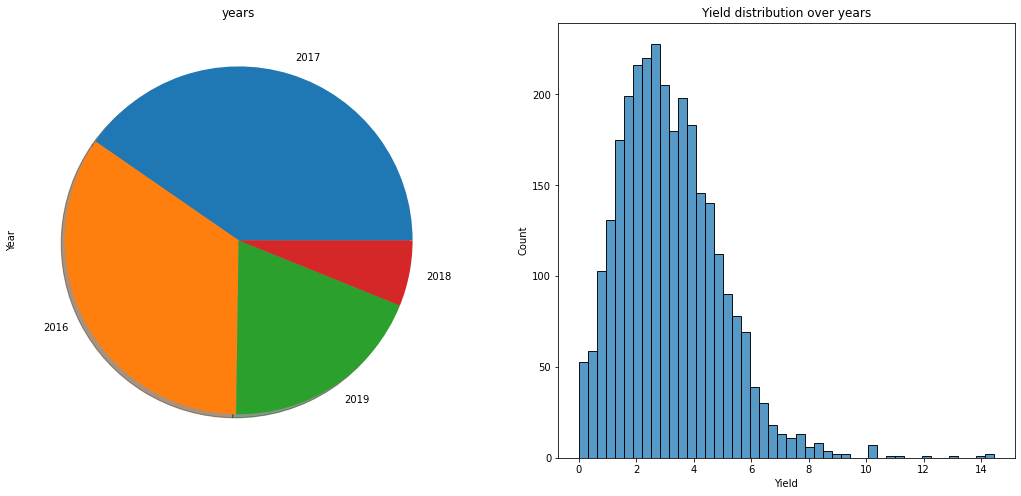

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df_maxmin_train['Year'].value_counts().plot.pie(ax=ax[0],shadow=True)
ax[0].set_title('years')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.histplot(x="Yield", data=df_maxmin_train, palette="Set1")
ax[1].set_title("Yield distribution over years")

plt.show()

In [30]:
df_maxmin_train["Yield>3.16"] = df_maxmin_train["Yield"] >= 3.168022495755512


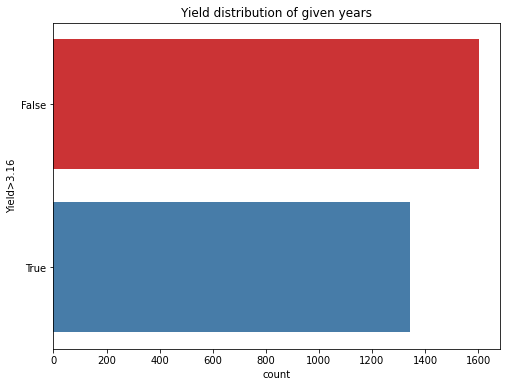

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="Yield>3.16", data=df_maxmin_train, palette="Set1")
ax.set_title("Yield distribution of given years")
plt.show()

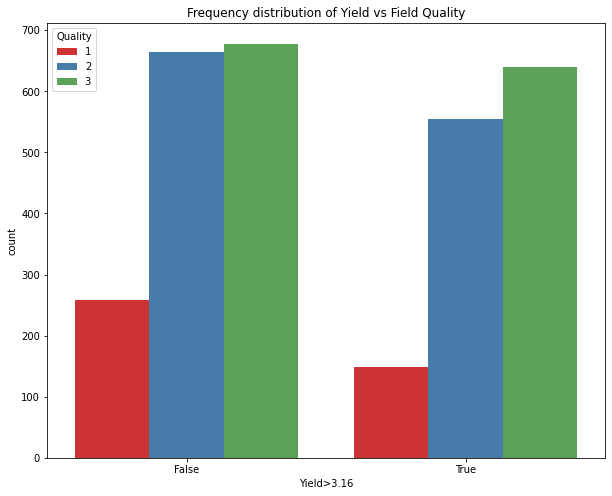

In [32]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Yield>3.16", hue="Quality", data=df_maxmin_train, palette="Set1")
ax.set_title("Frequency distribution of Yield vs Field Quality")
plt.show()

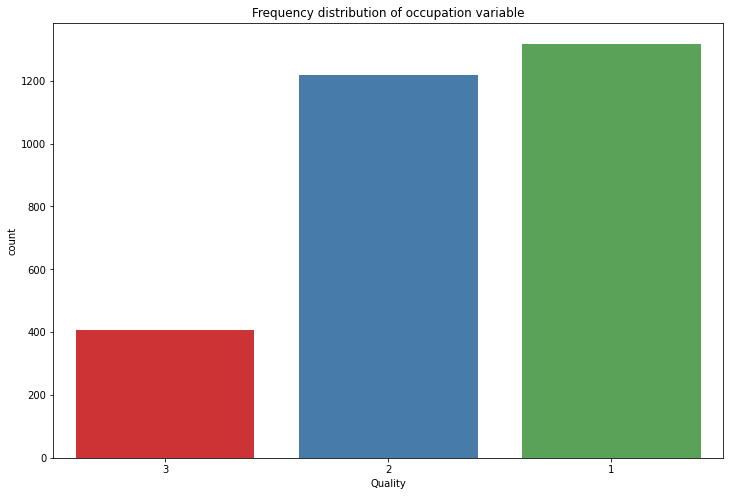

In [33]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="Quality", data=df_maxmin_train, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df_mean_train.Quality.value_counts().index)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


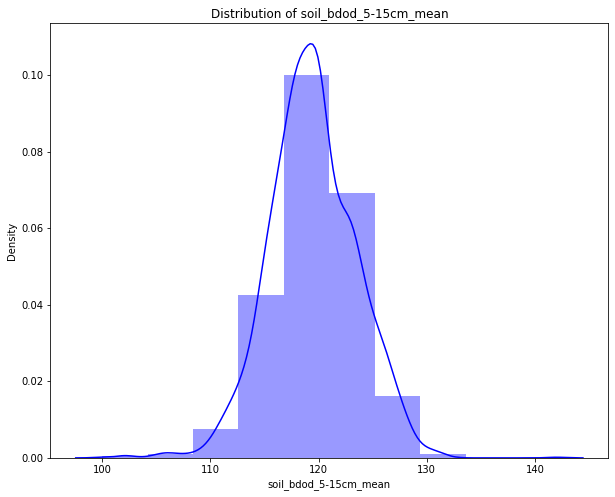

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


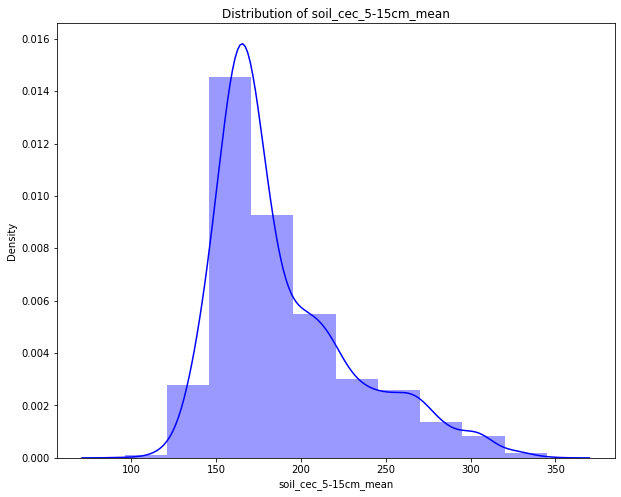

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


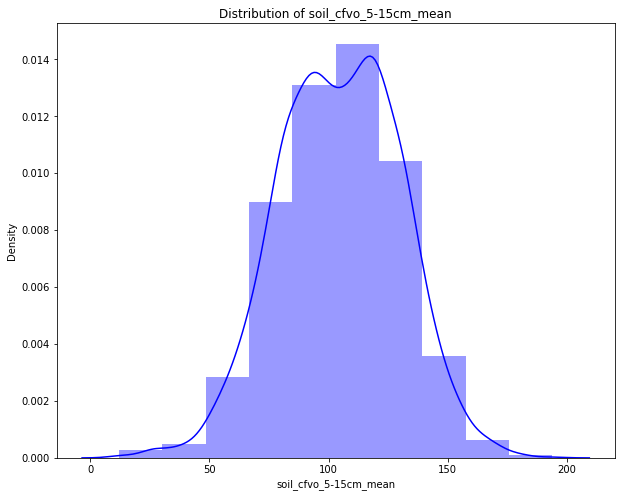

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


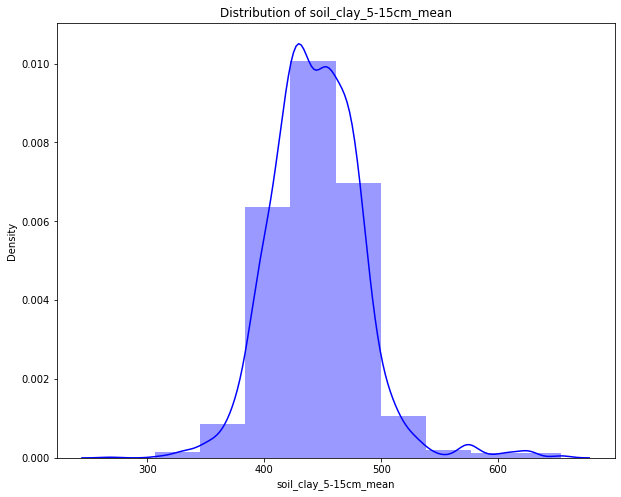

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


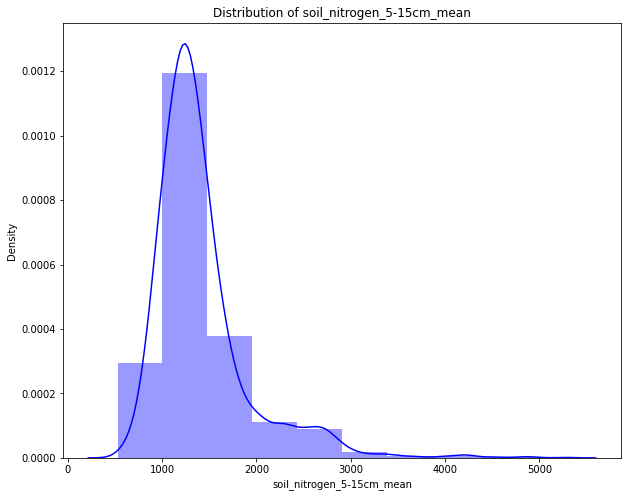

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


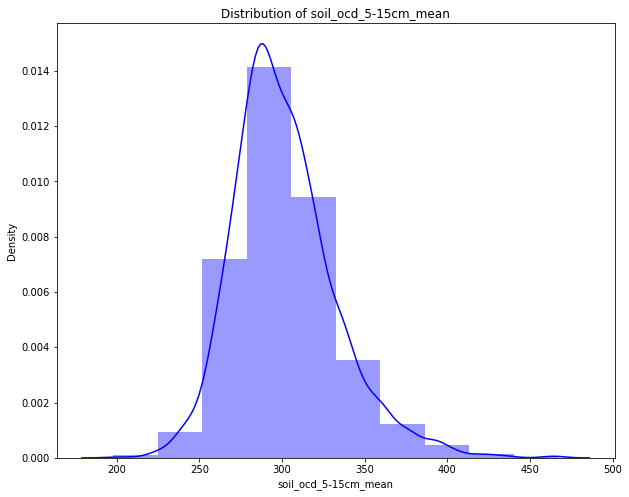

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


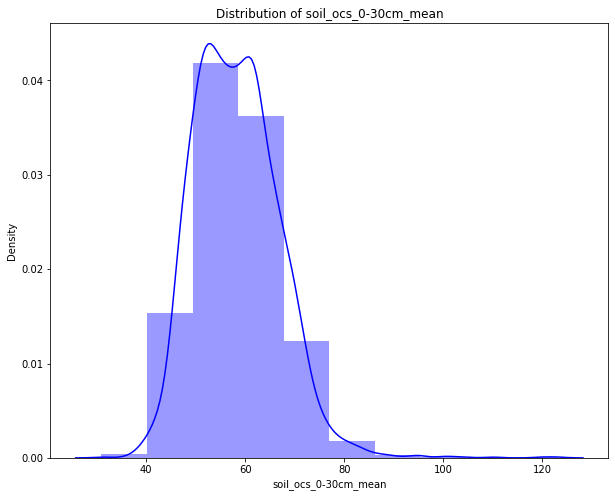

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


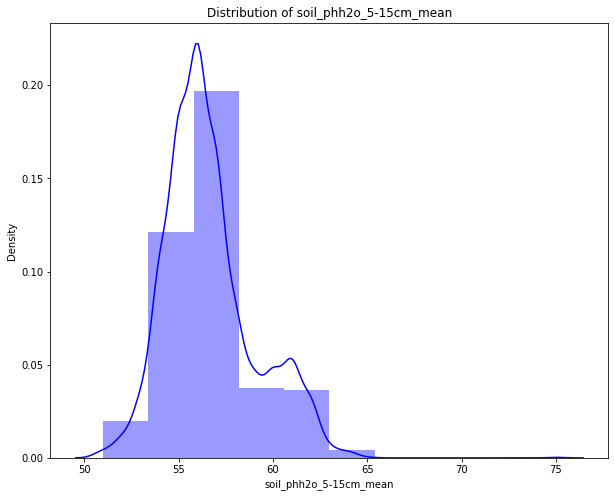

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


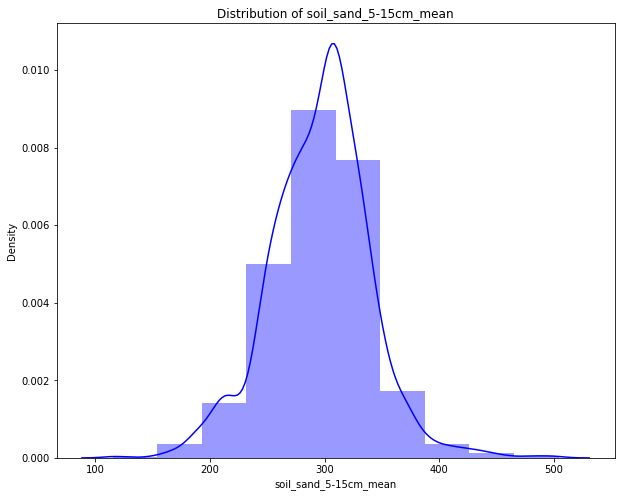

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


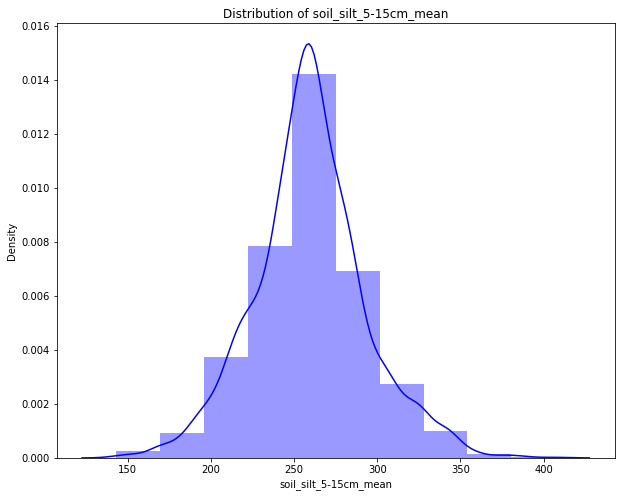

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


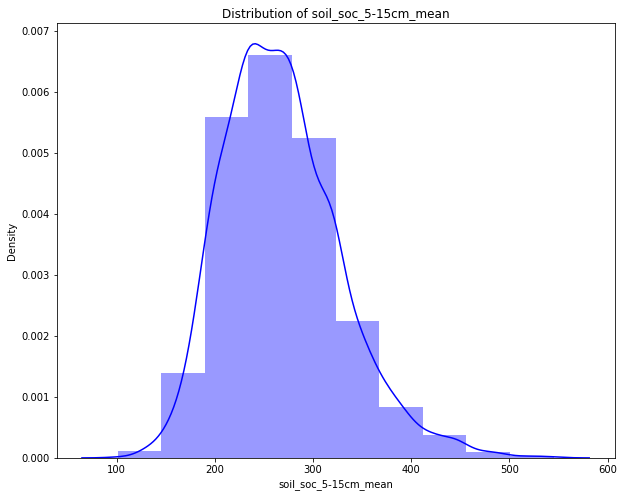

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


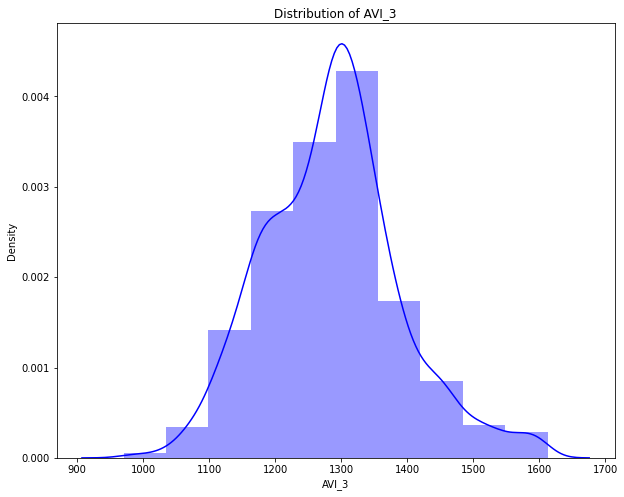

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


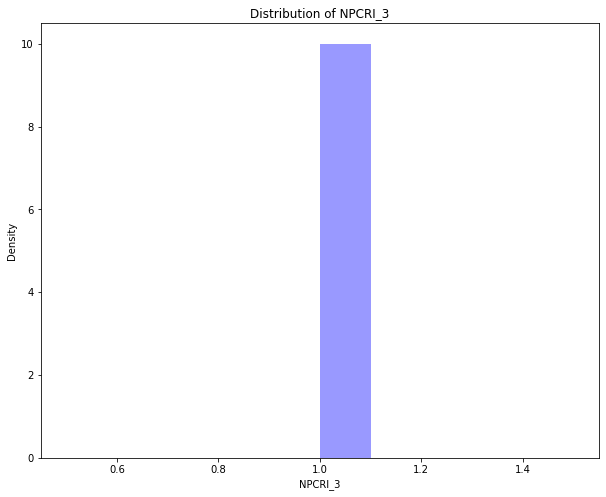

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


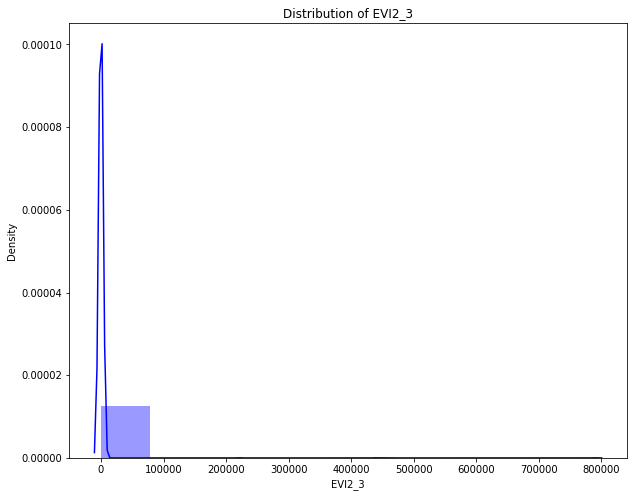

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


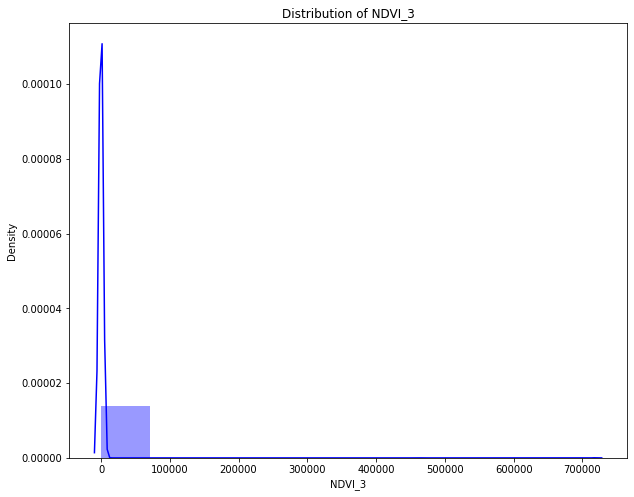

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


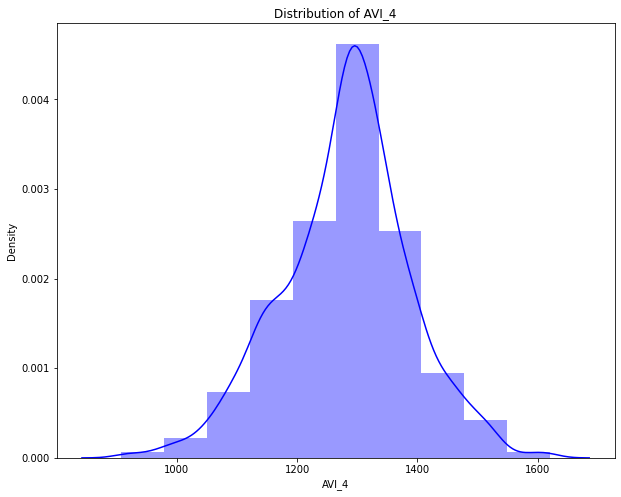

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


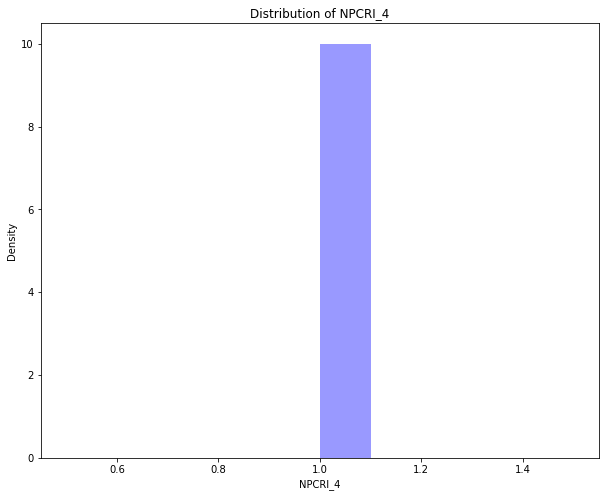

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


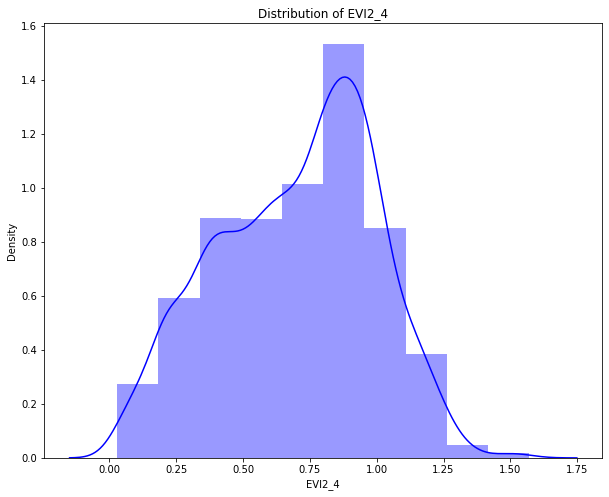

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


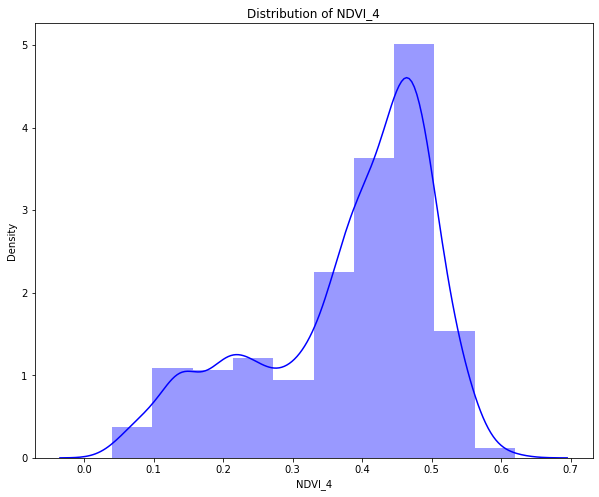

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


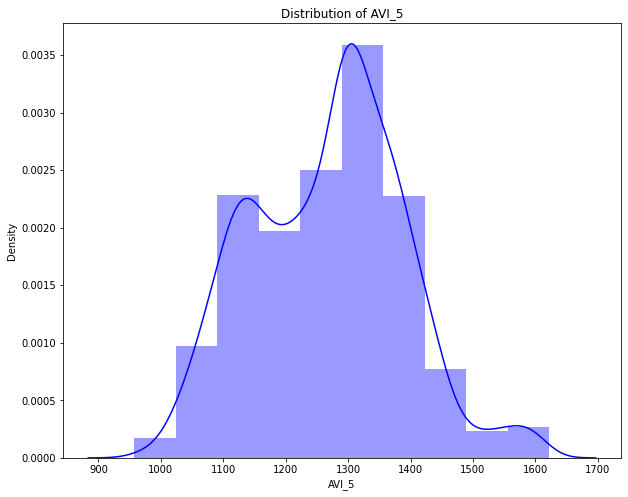

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


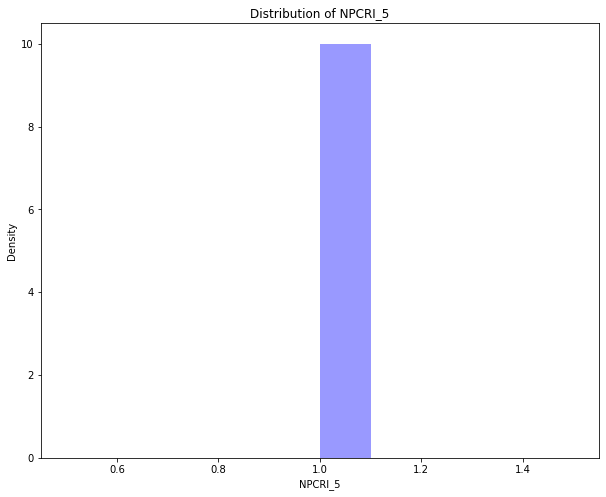

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


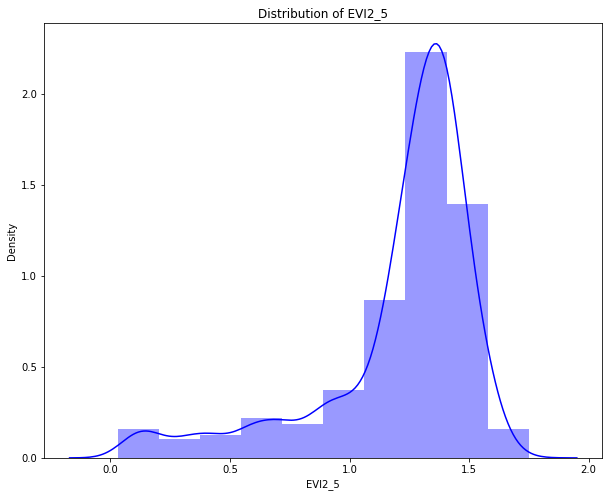

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


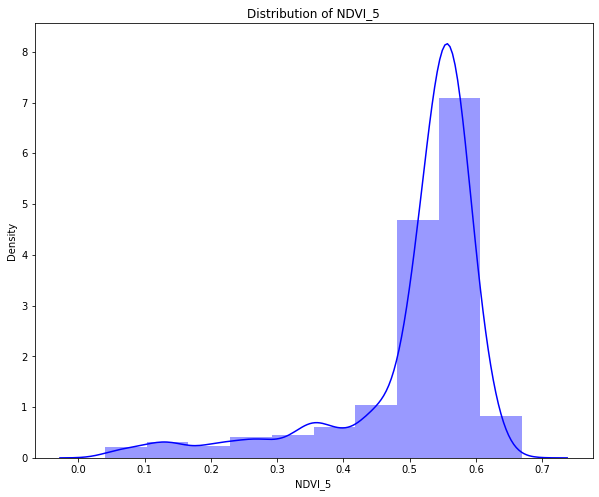

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


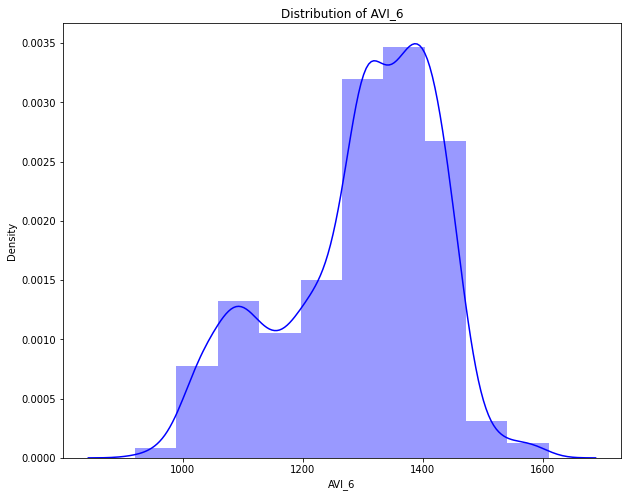

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


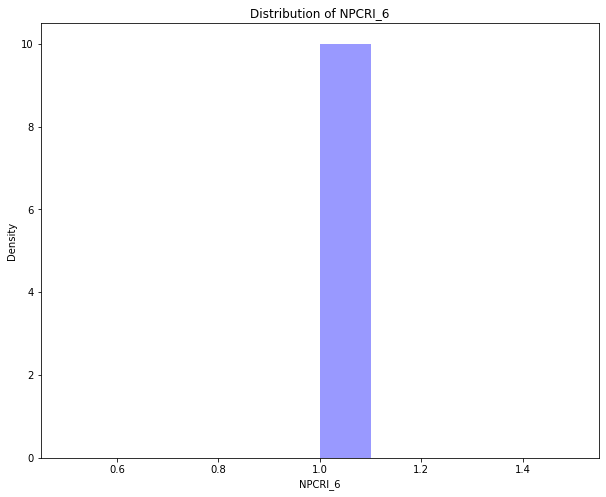

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


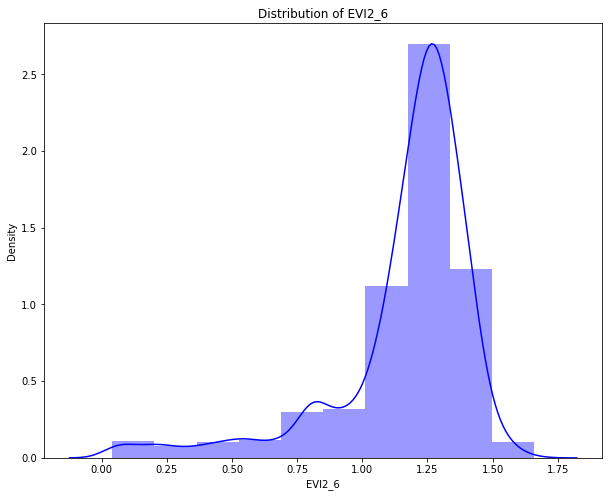

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


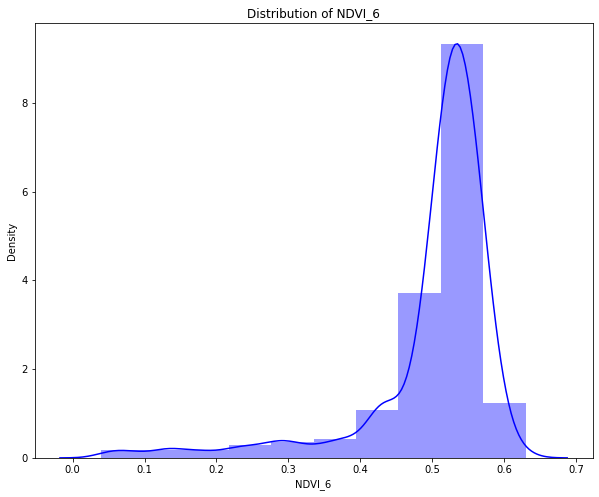

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


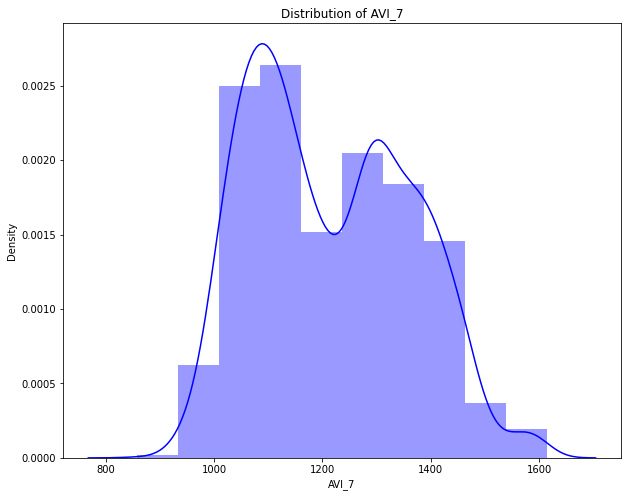

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


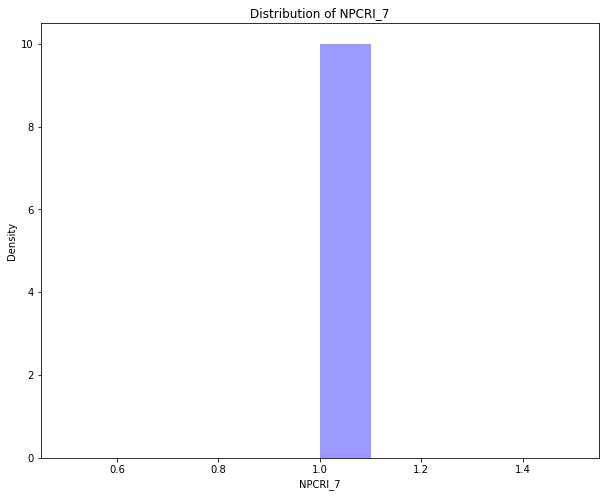

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


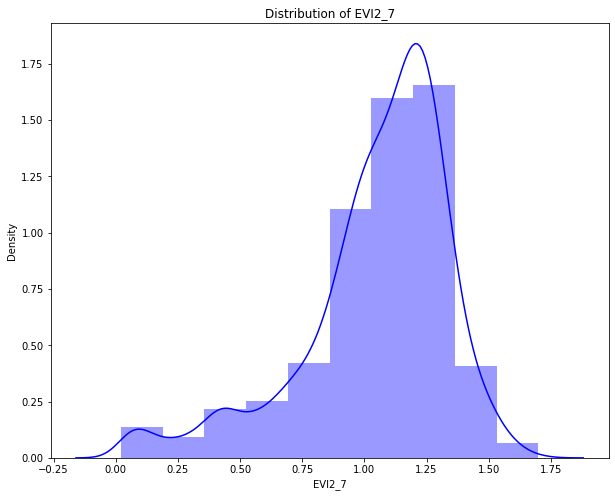

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


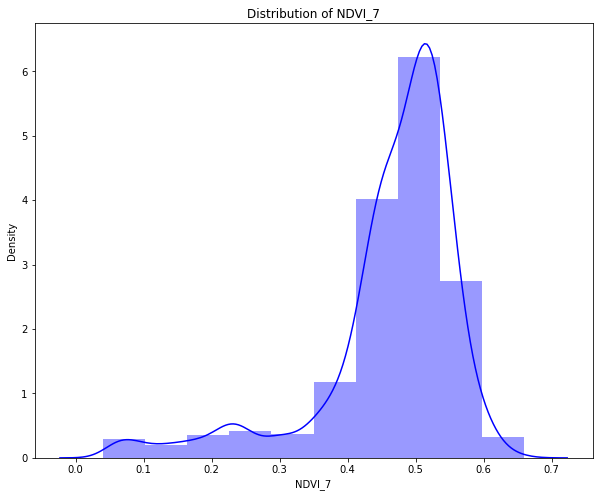

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


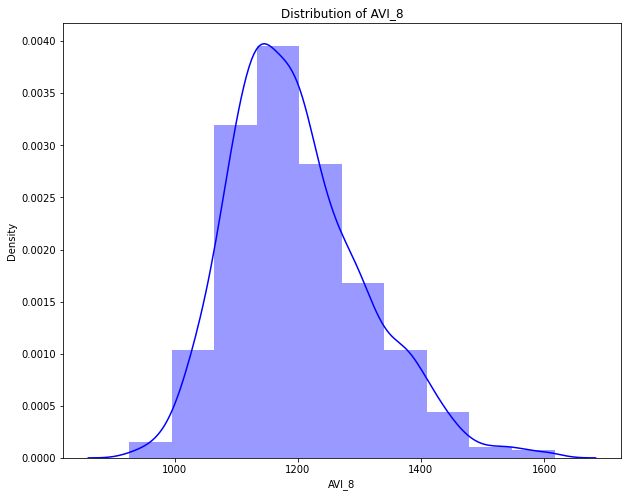

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


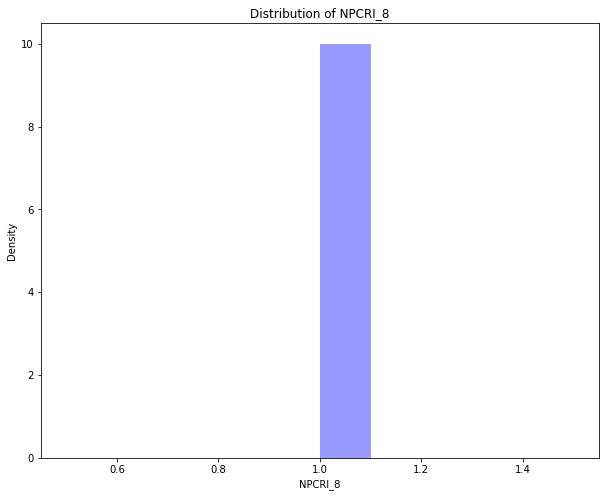

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


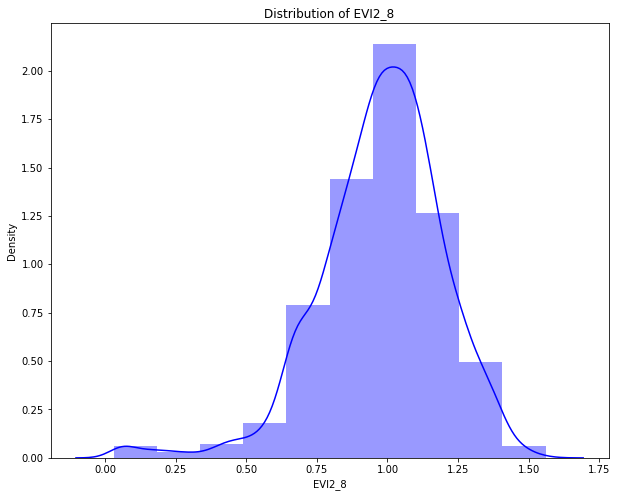

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


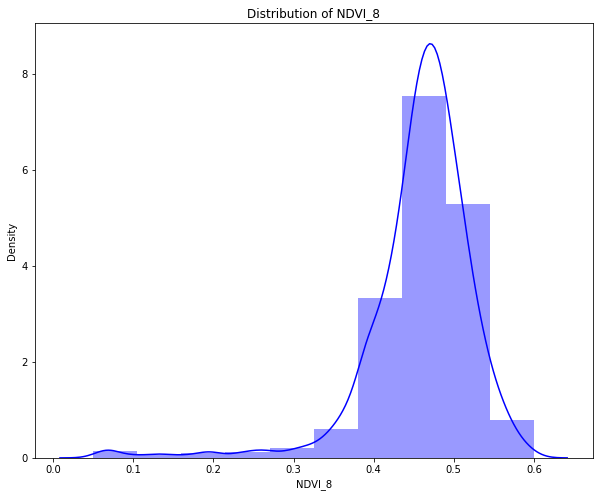

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


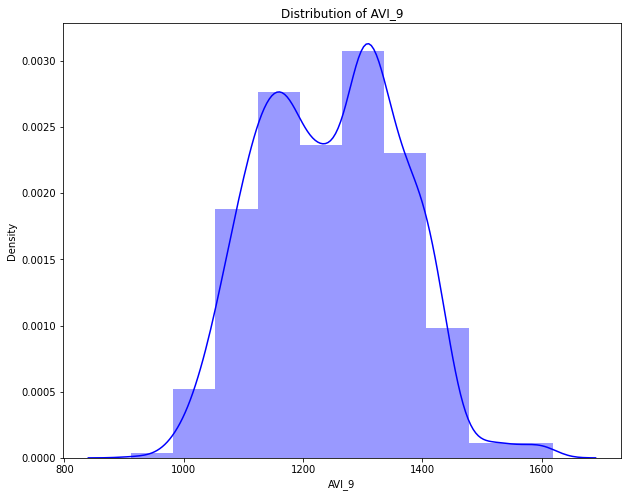

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


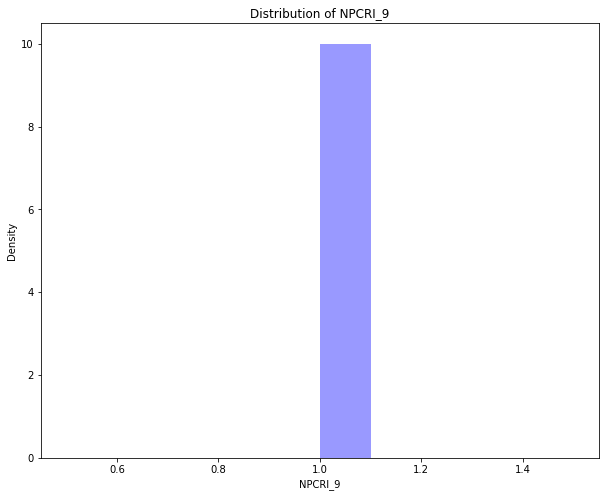

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


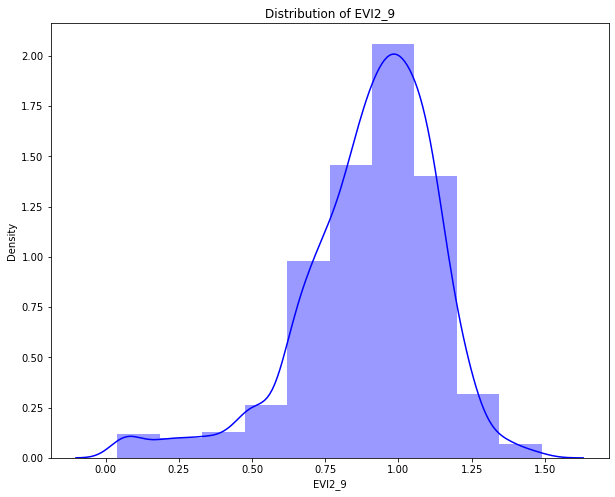

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


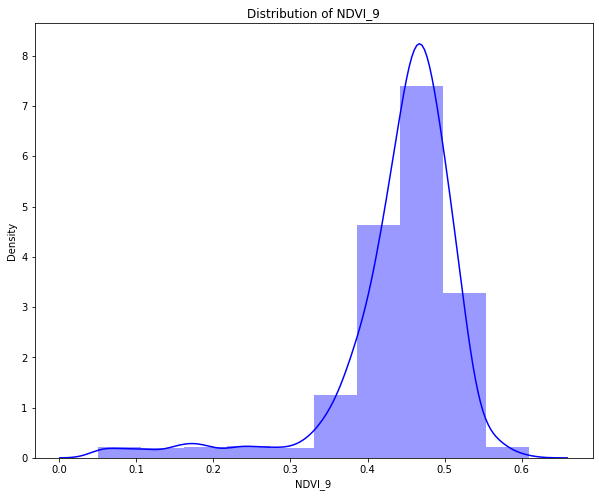

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


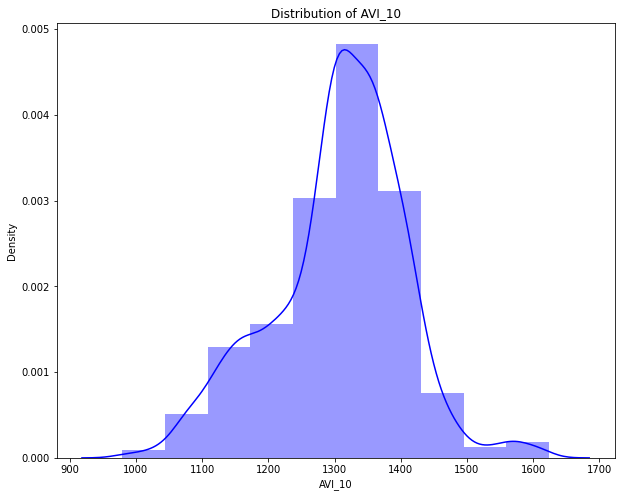

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


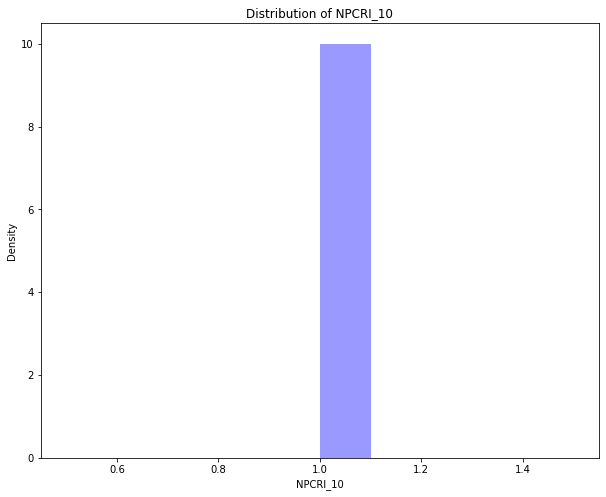

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


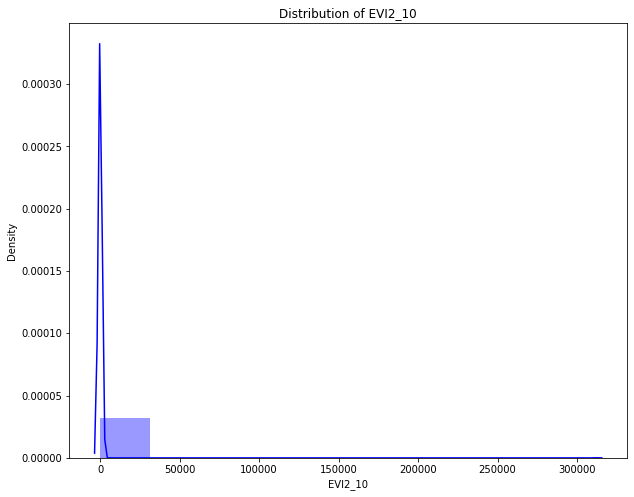

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


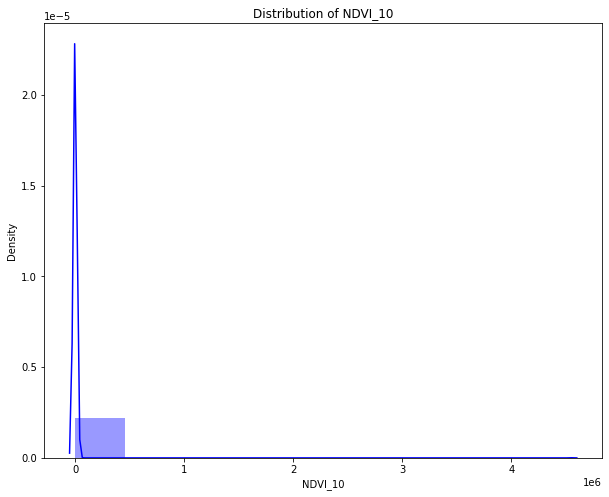

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


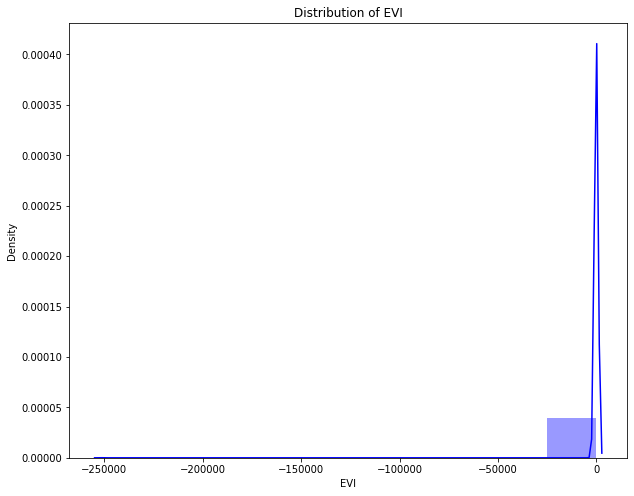

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


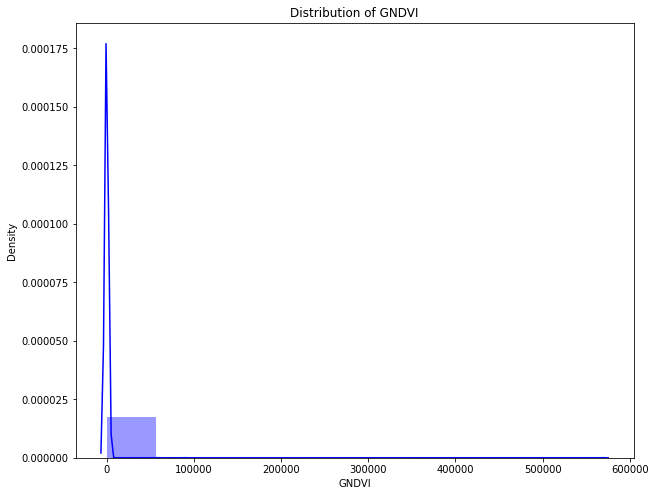

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


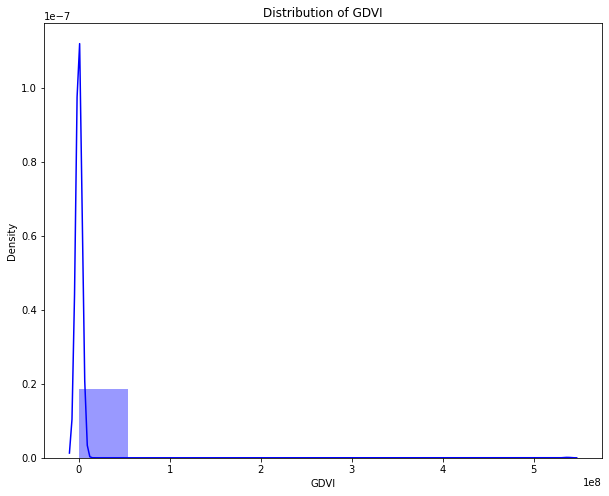

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


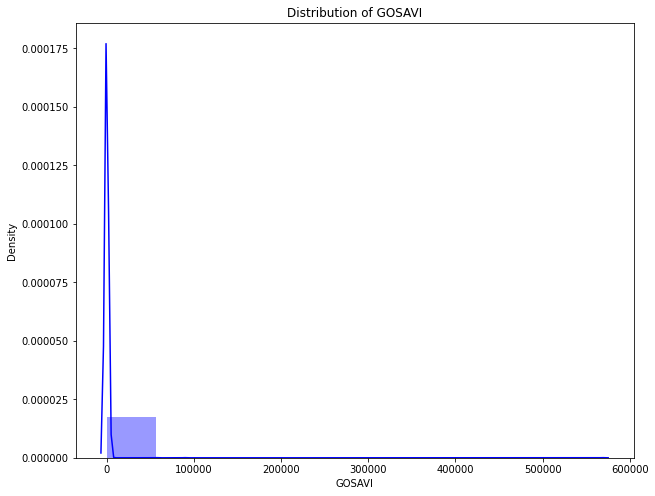

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


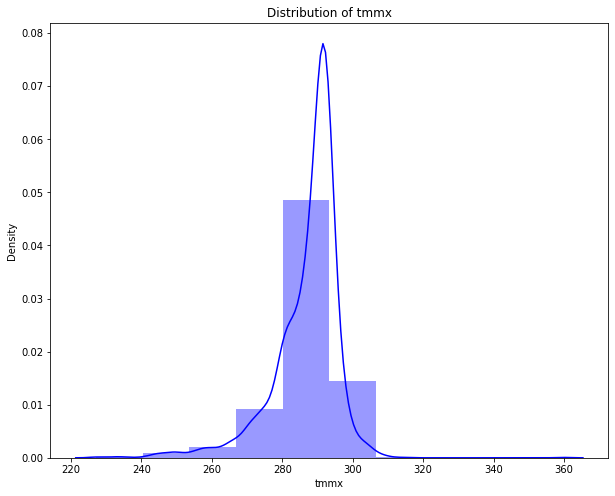

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


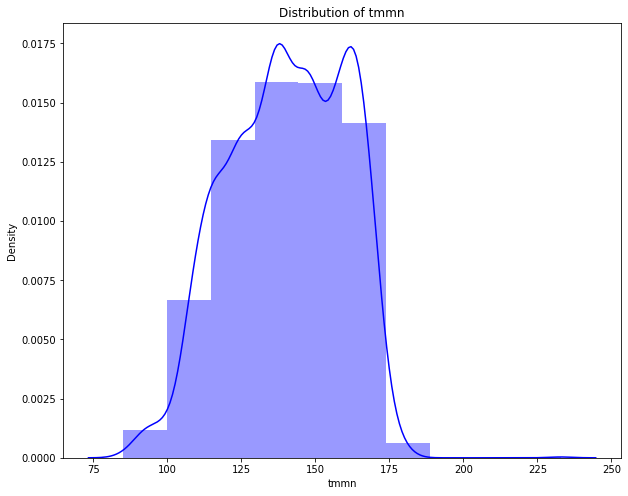

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


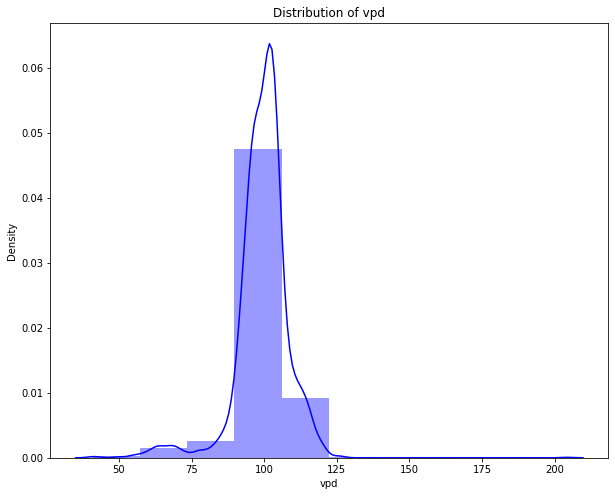

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


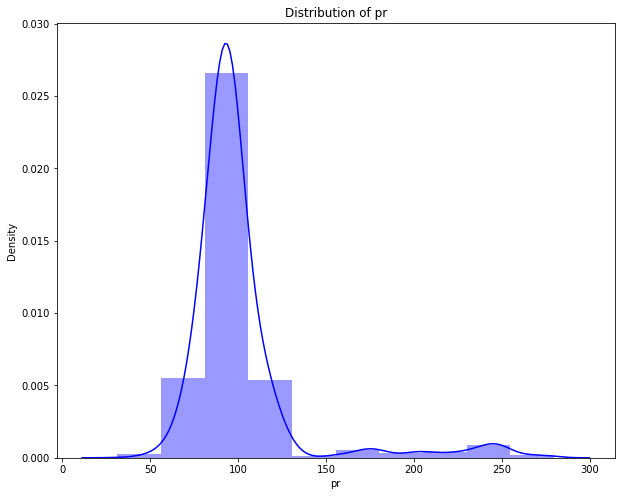

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


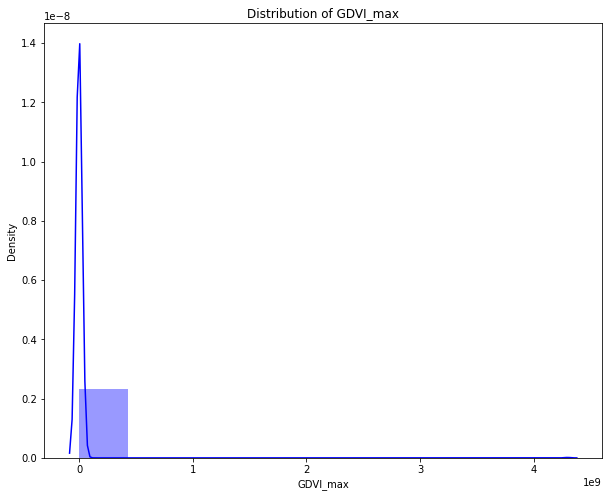

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


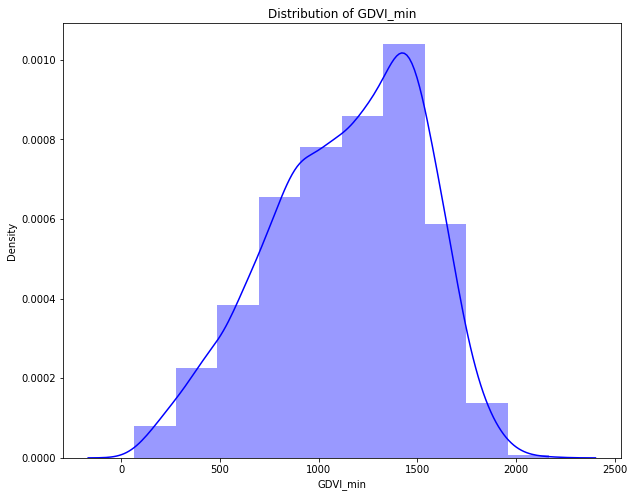

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


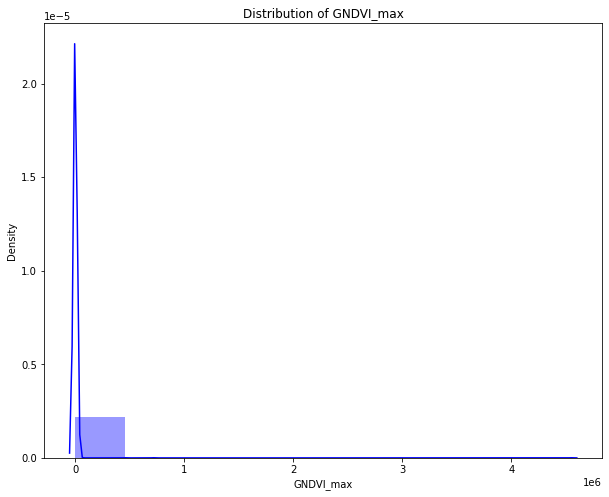

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


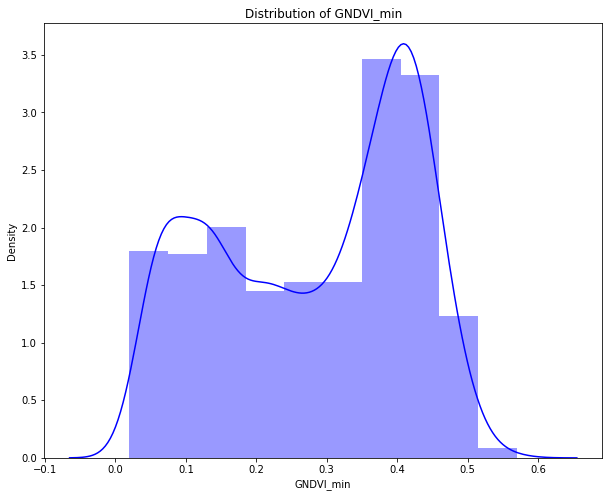

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


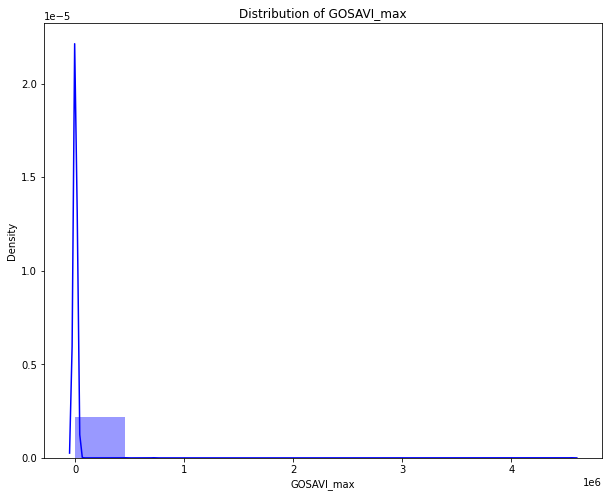

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


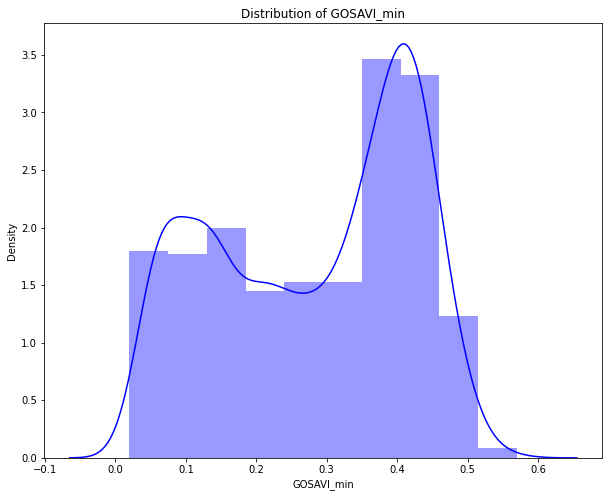

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


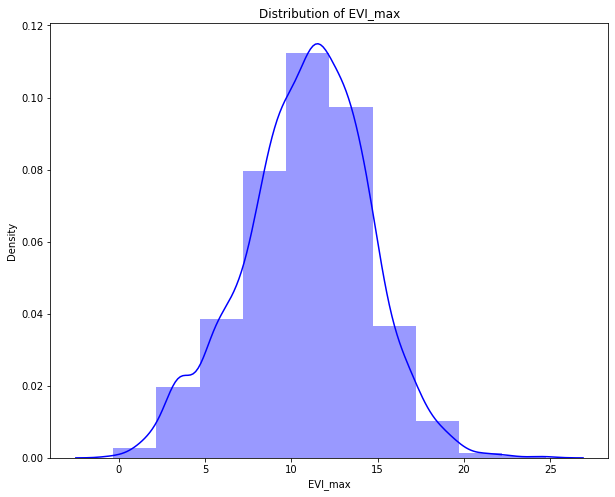

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


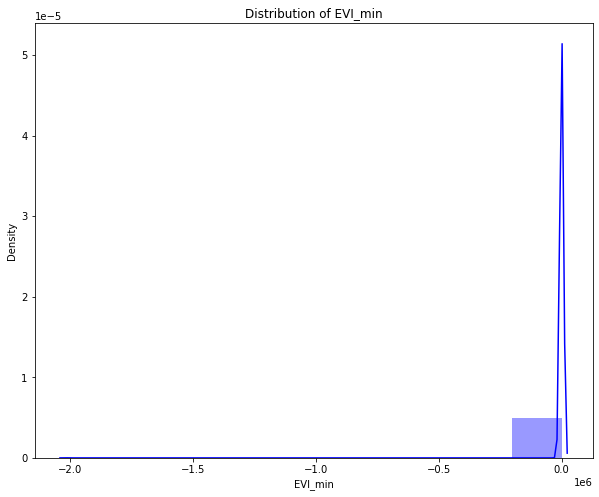

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


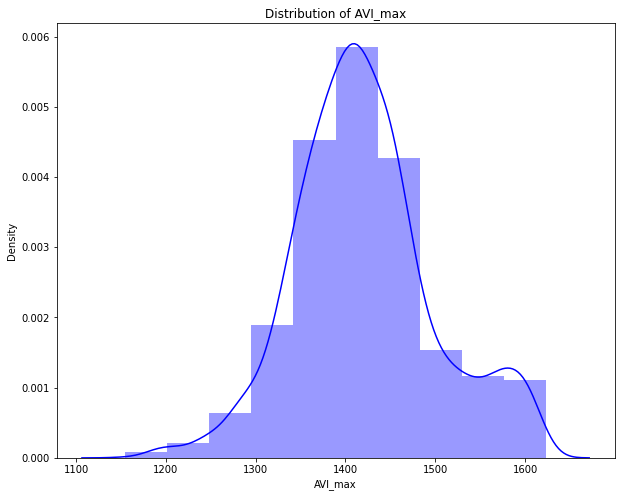

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


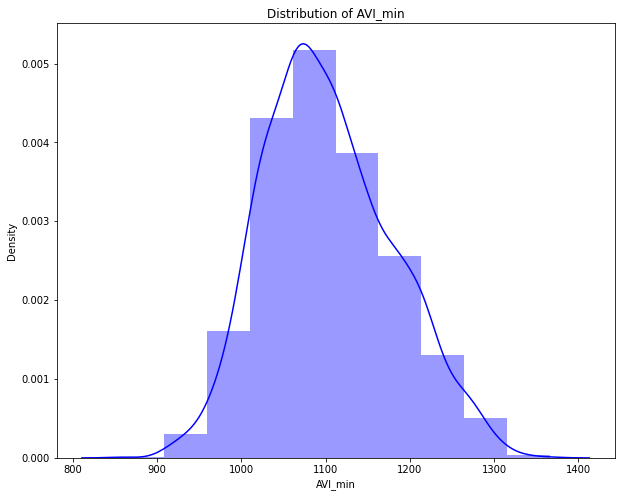

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


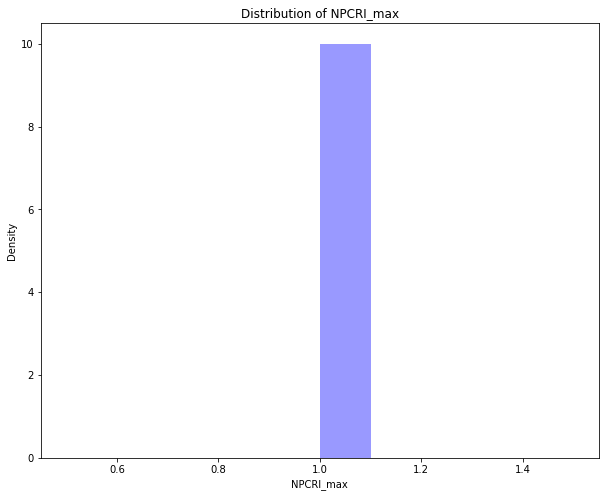

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


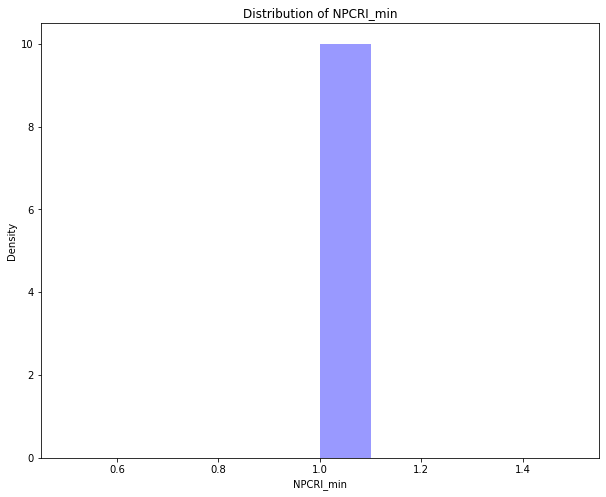

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


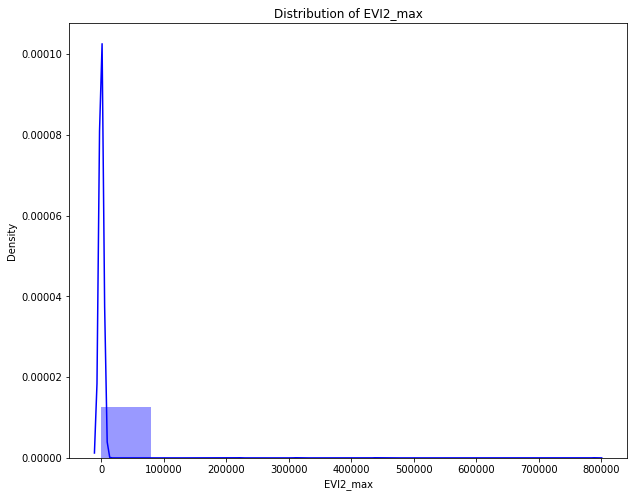

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


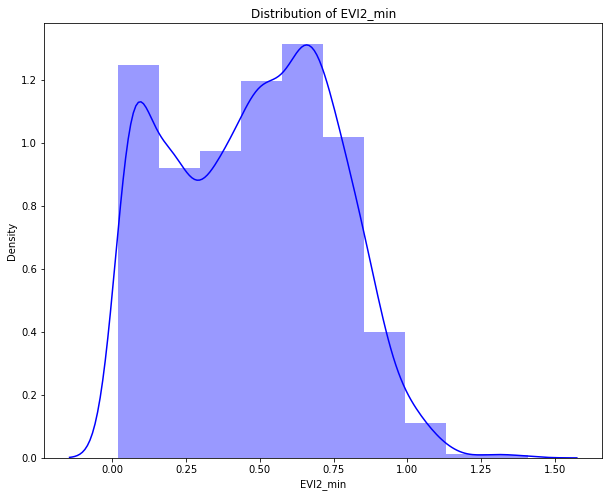

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


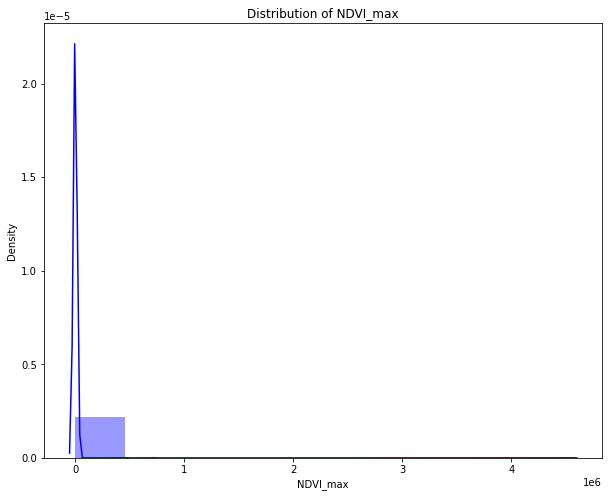

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


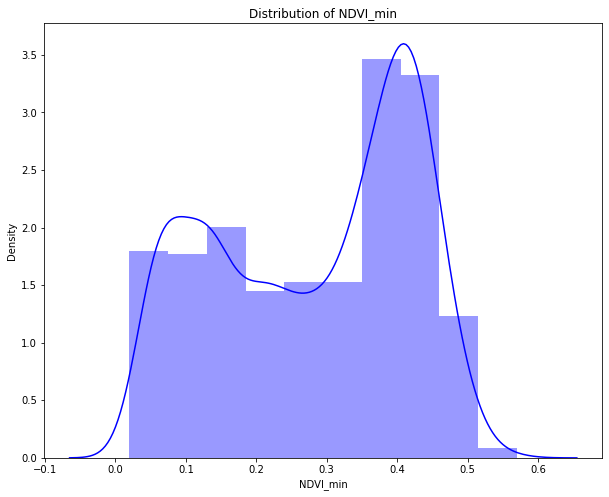

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


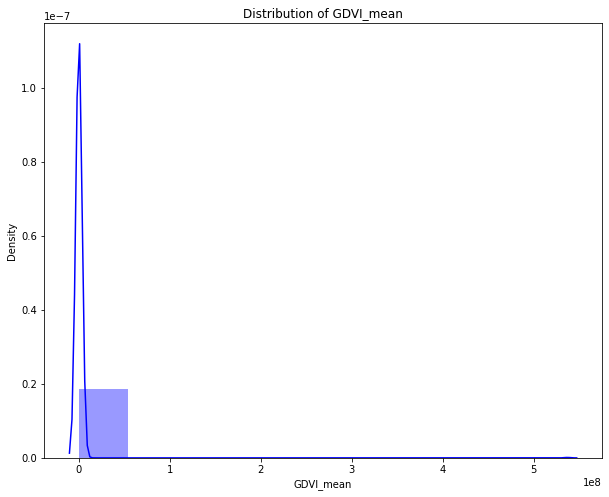

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


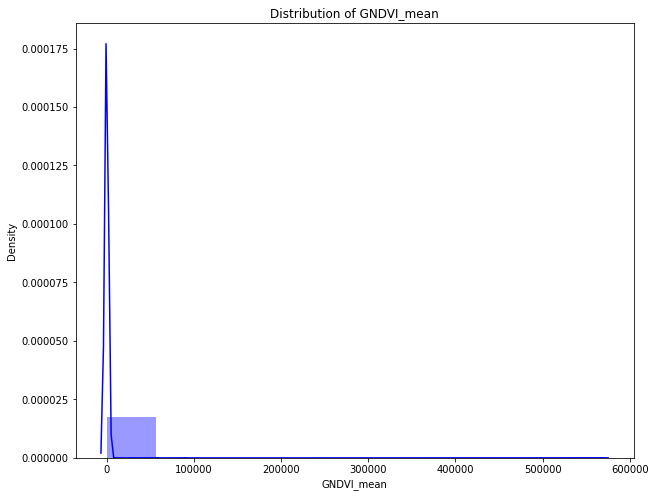

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


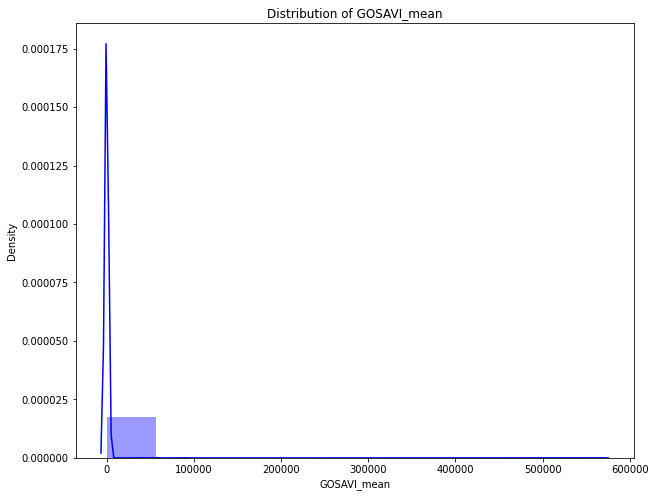

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


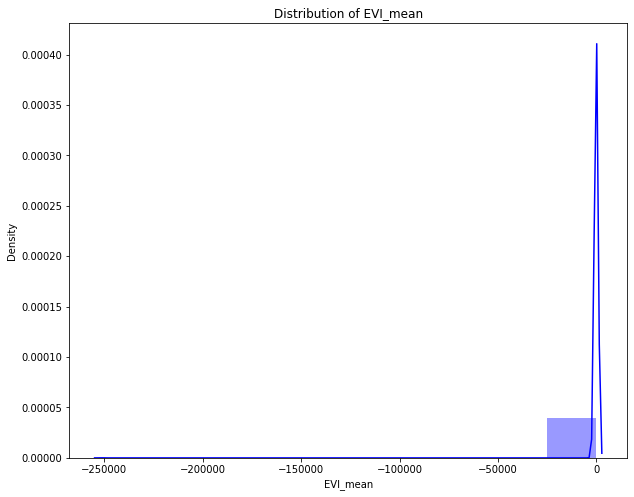

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


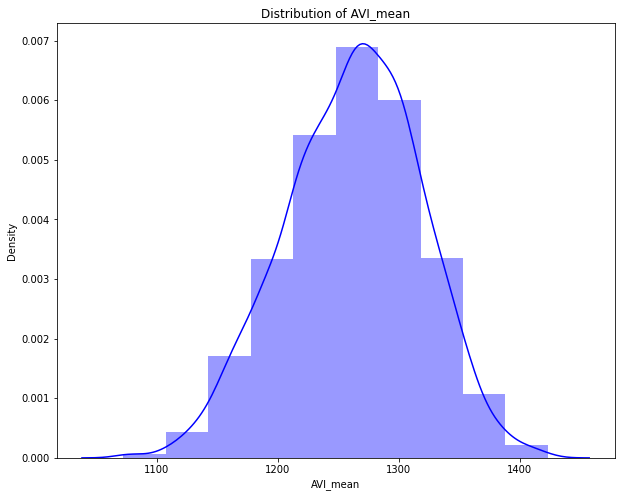

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


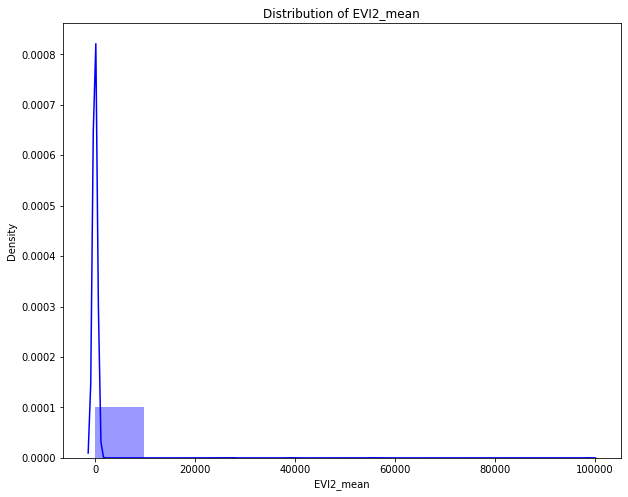

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


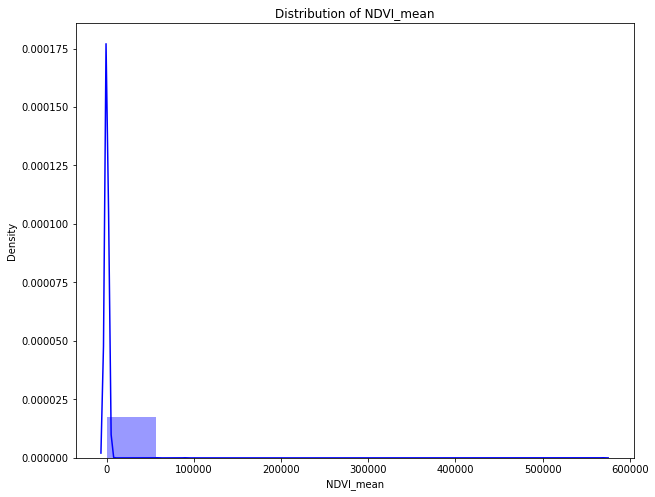

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


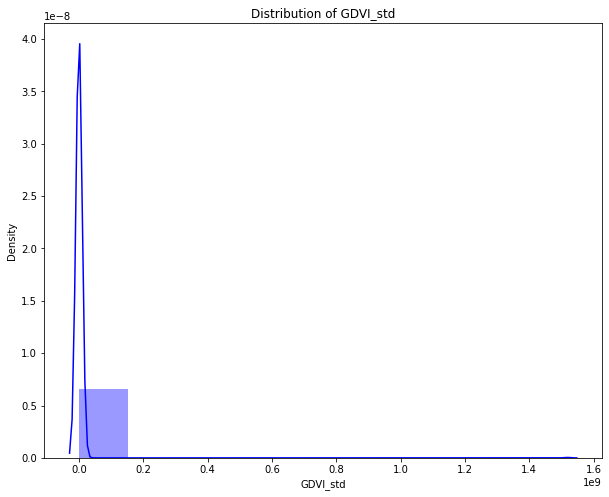

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


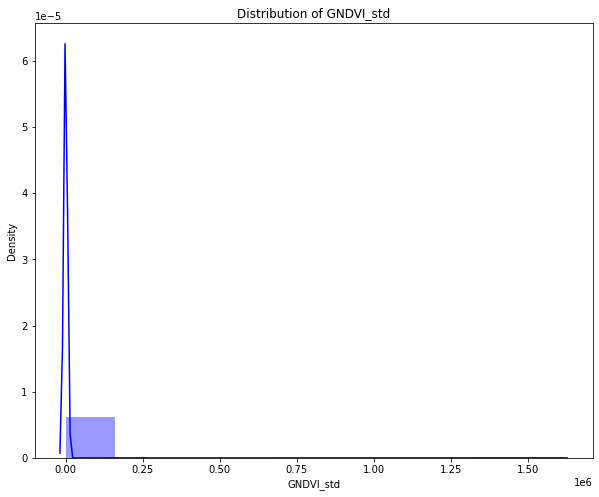

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


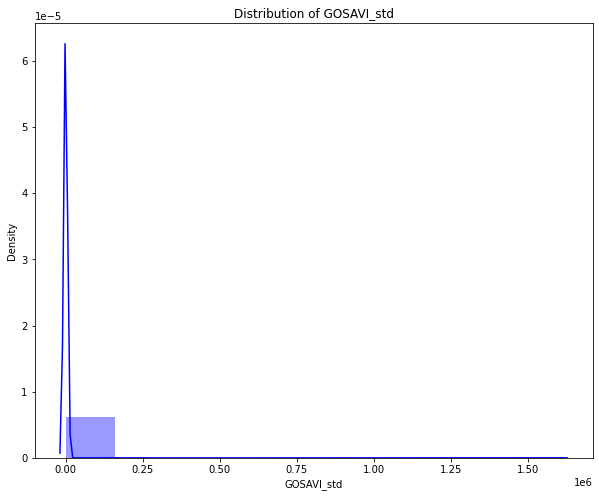

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


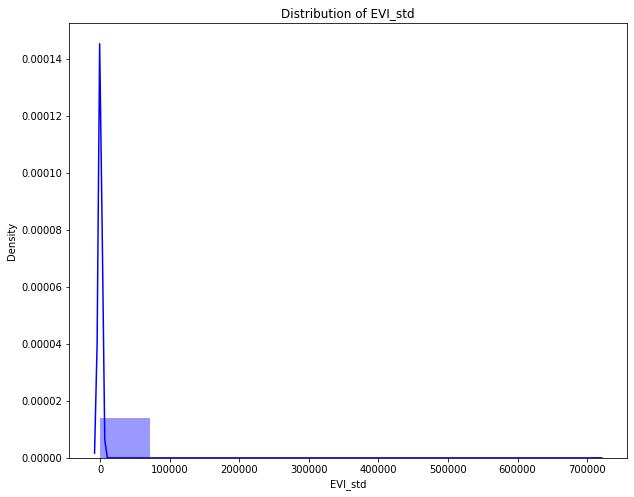

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


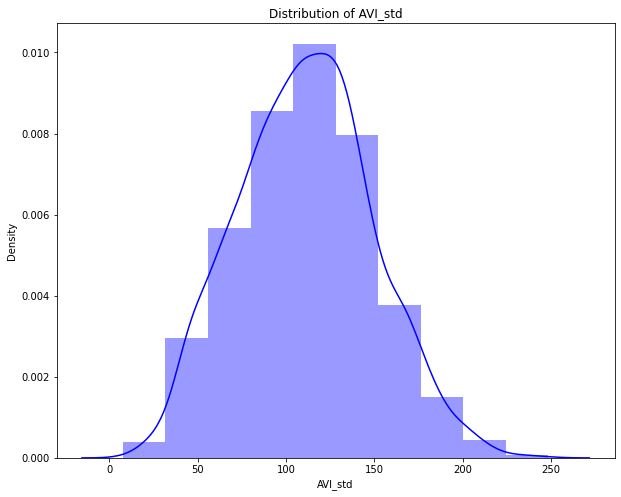

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


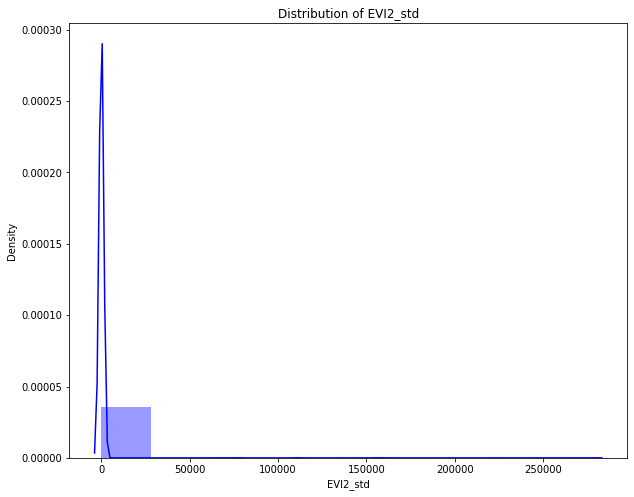

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


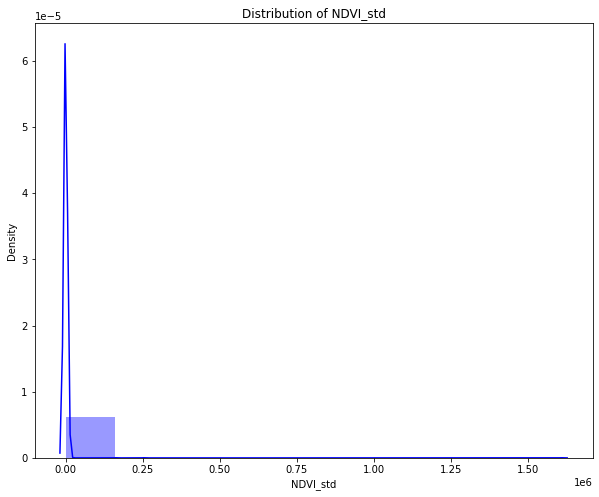

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


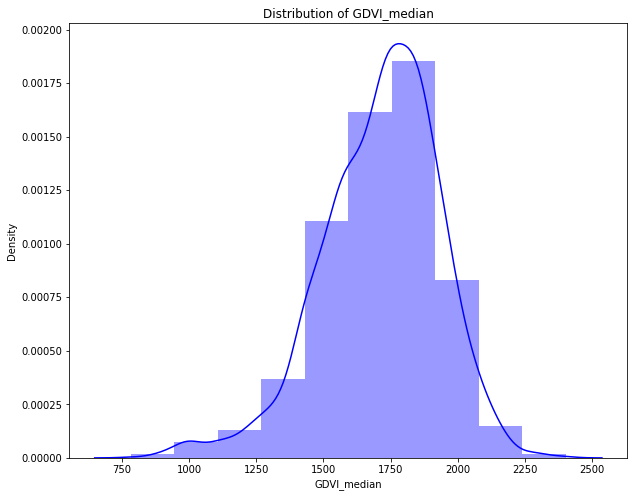

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


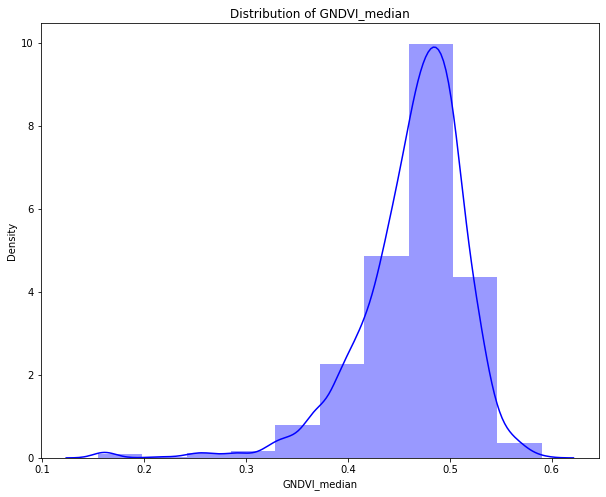

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


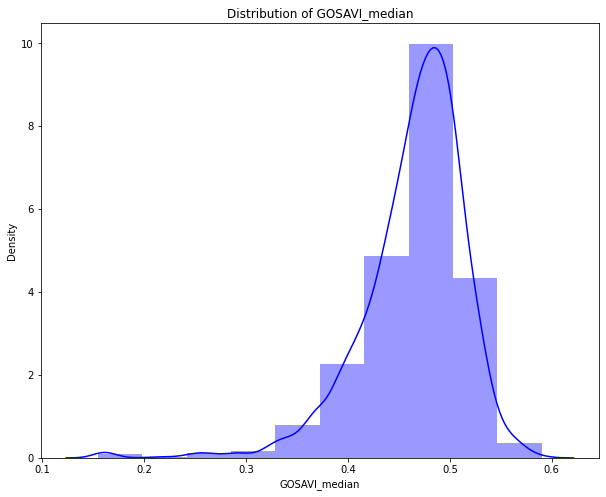

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


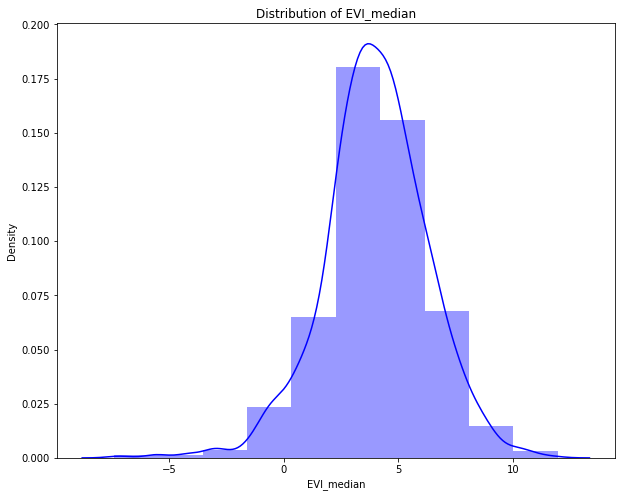

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


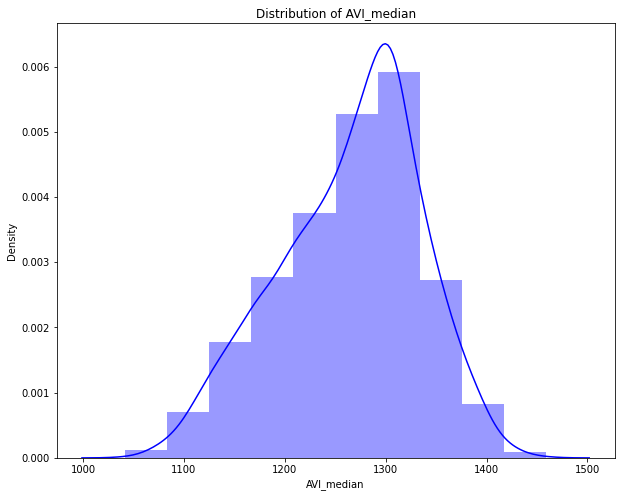

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


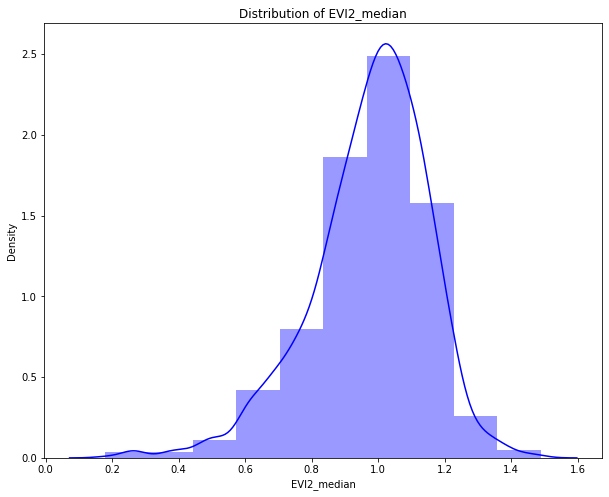

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


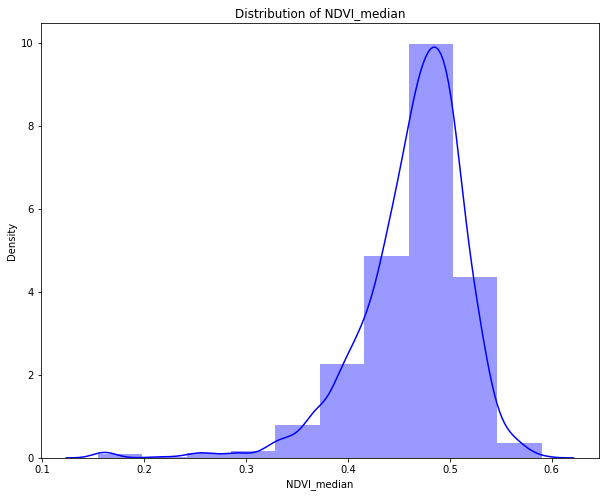

In [34]:
for col in cols:
    f, ax = plt.subplots(figsize=(10,8))
    x = df_maxmin_train[col]
    ax = sns.distplot(x, bins=10, color='blue')
    ax.set_title("Distribution of "+ col)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


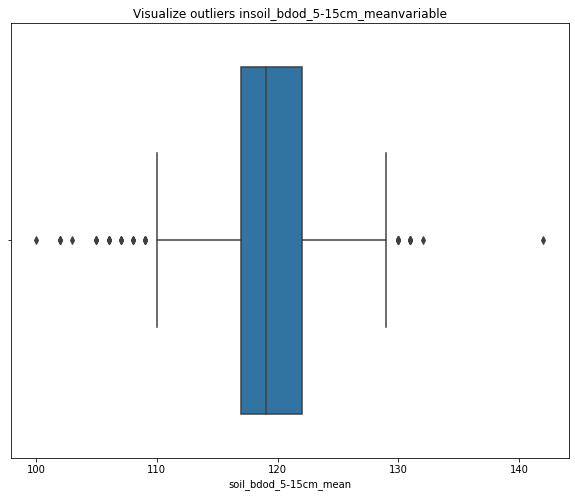

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


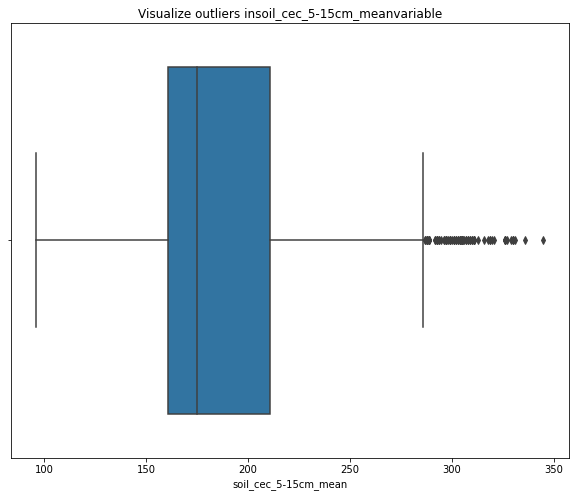

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


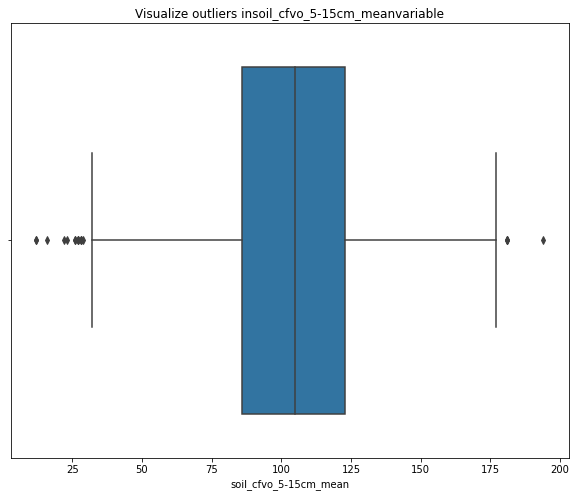

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


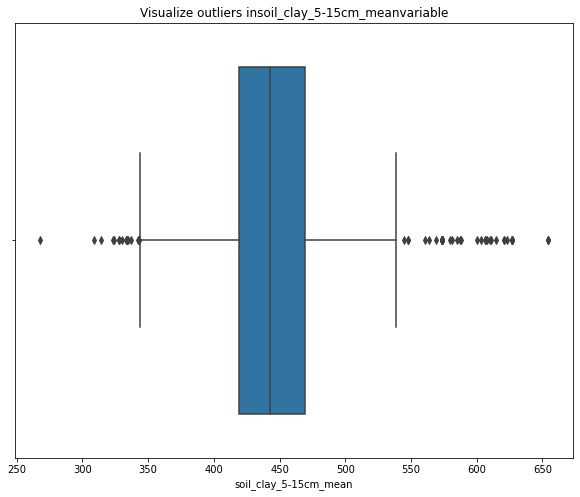

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


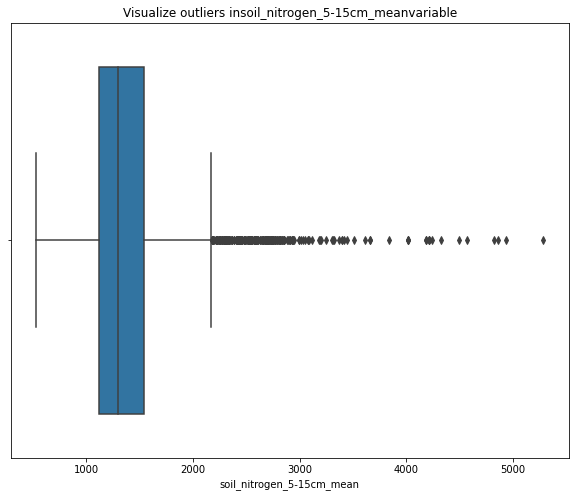

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


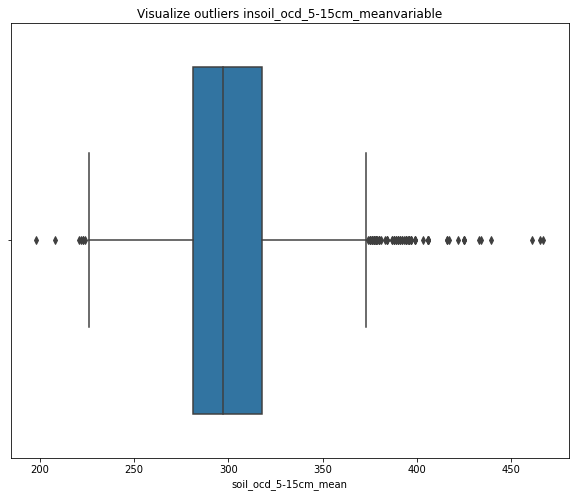

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


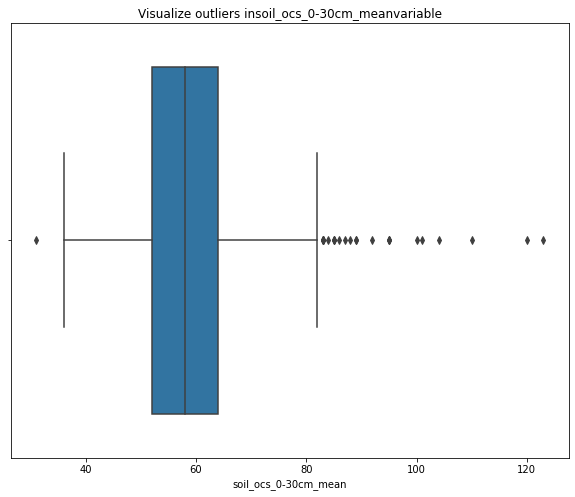

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


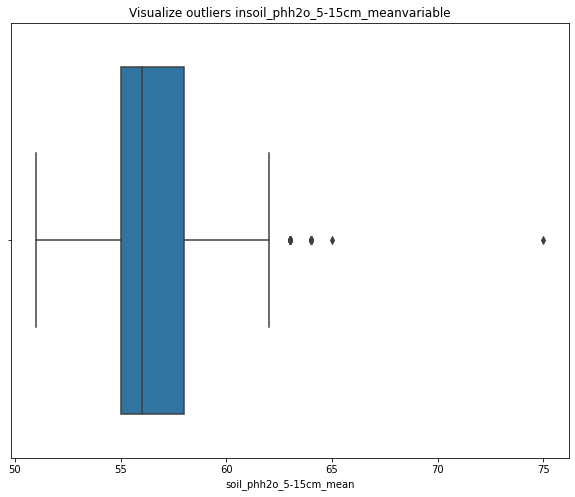

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


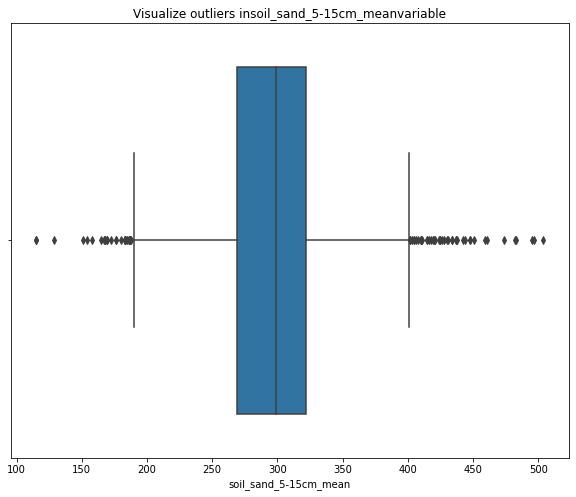

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


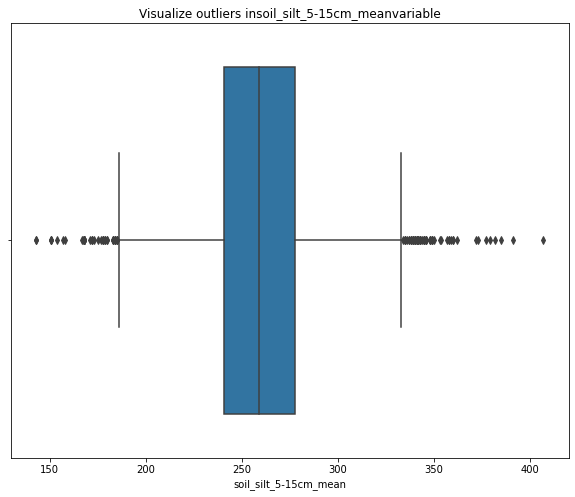

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


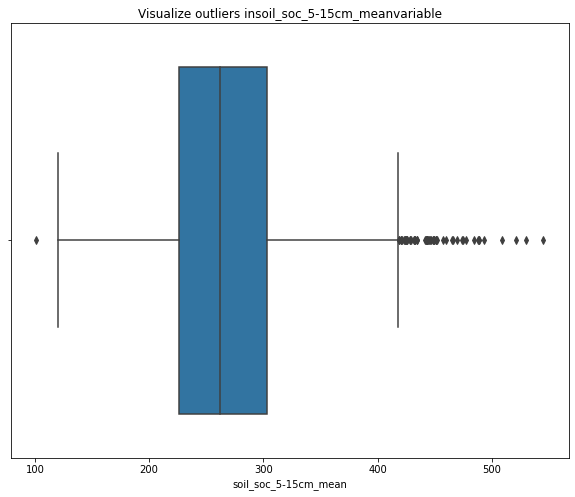

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


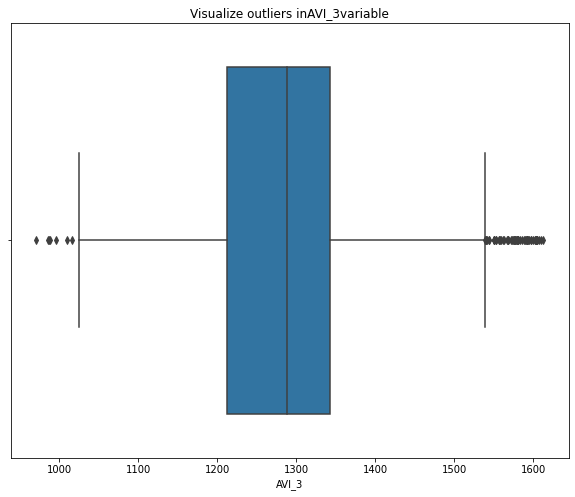

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


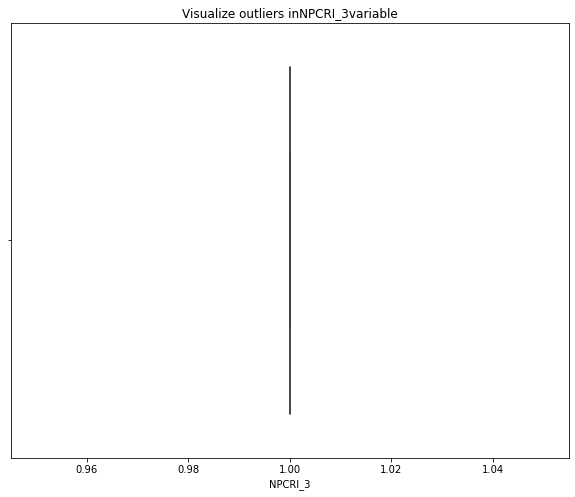

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


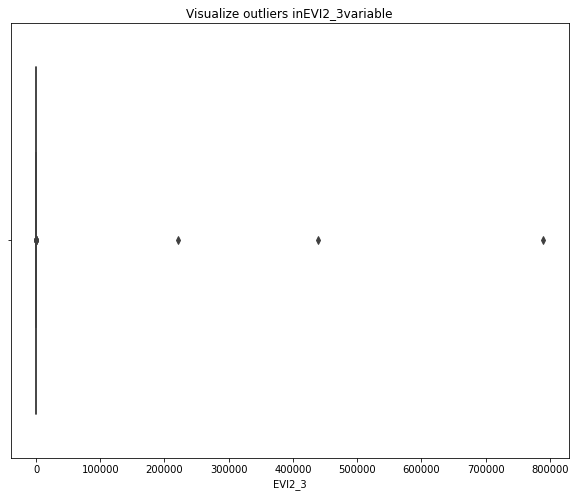

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


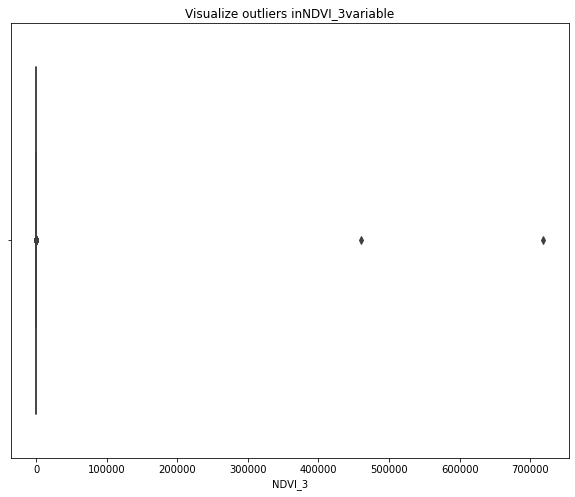

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


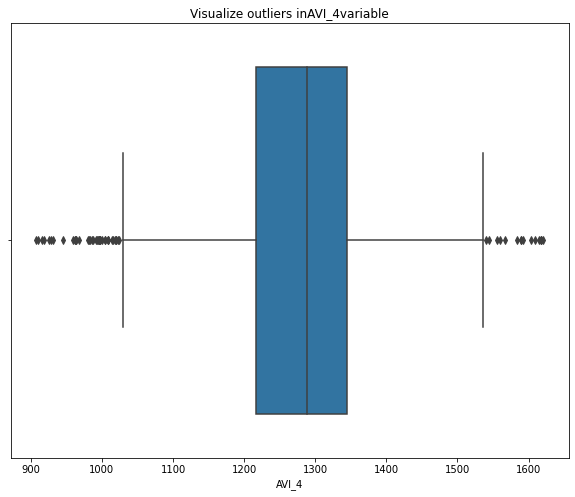

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


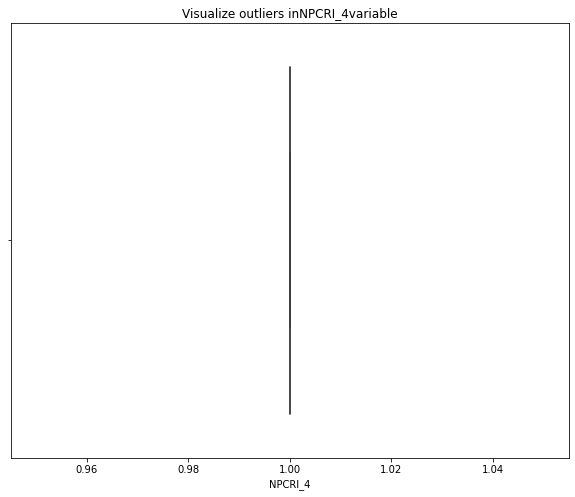

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


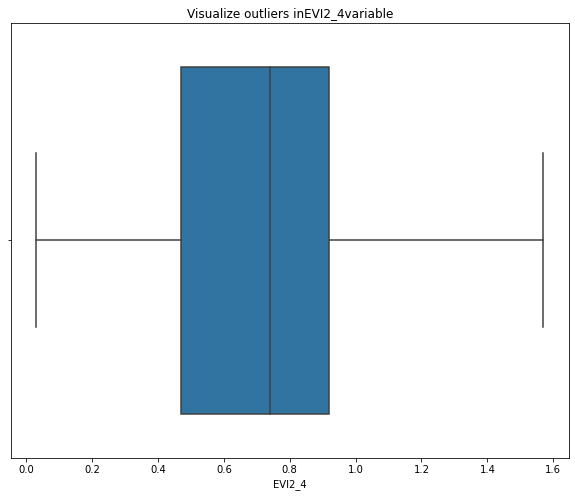

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


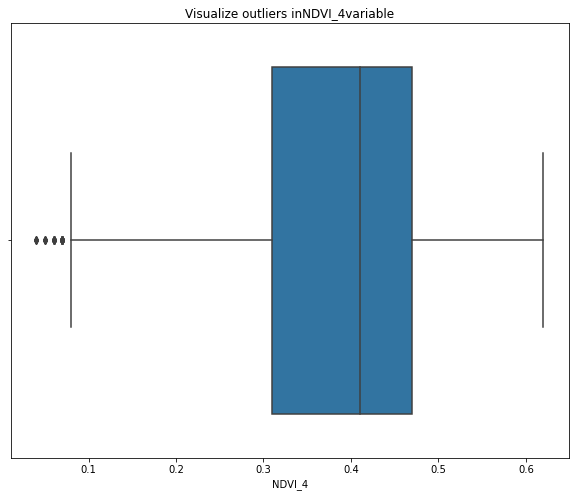

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


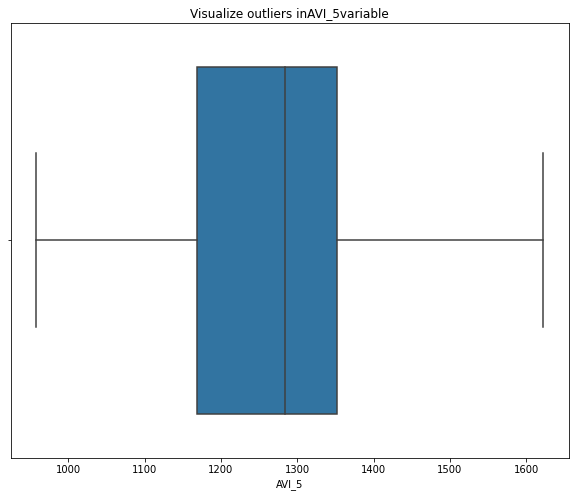

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


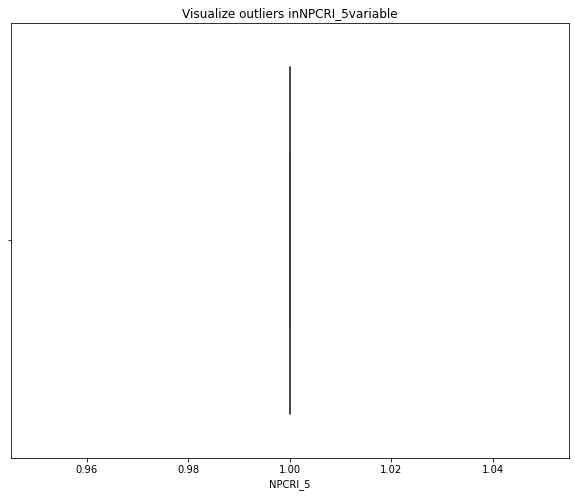

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


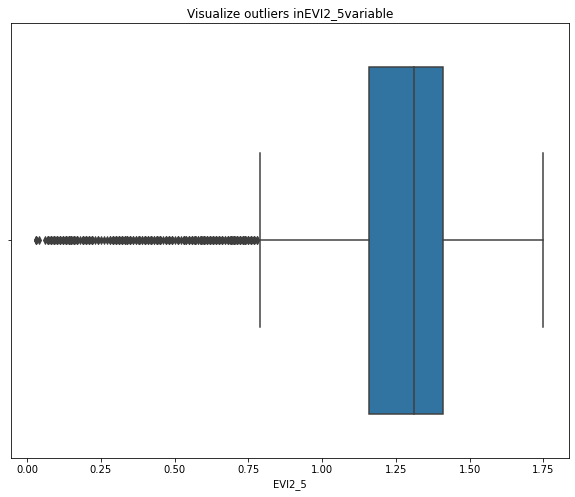

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


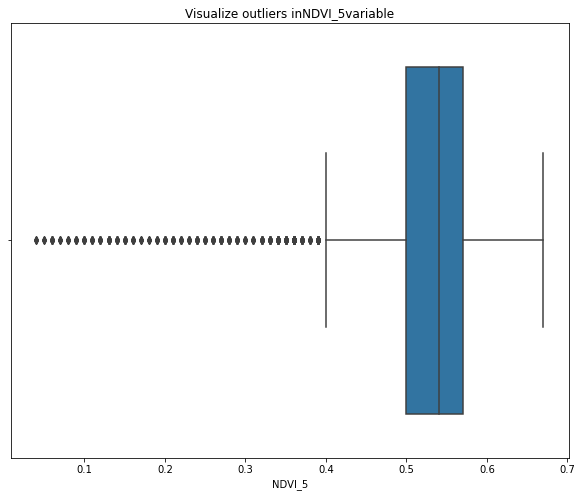

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


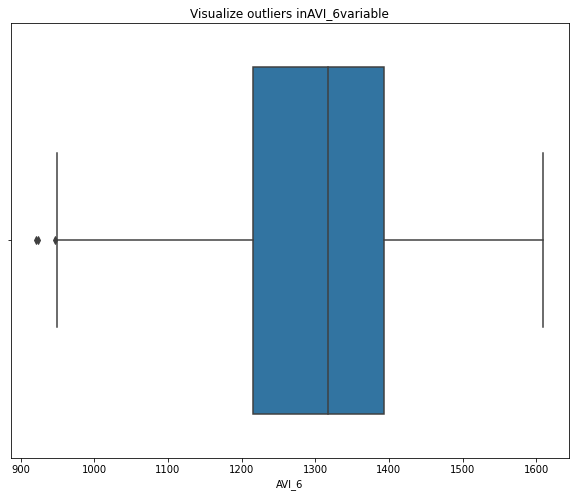

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


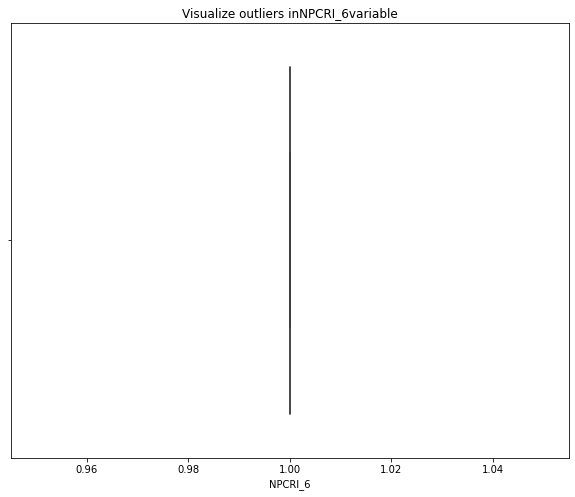

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


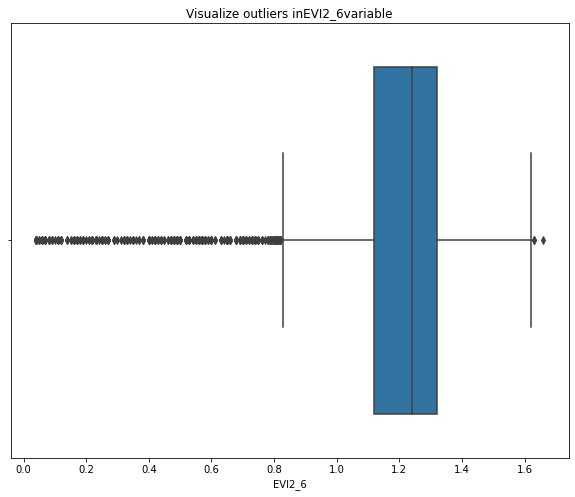

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


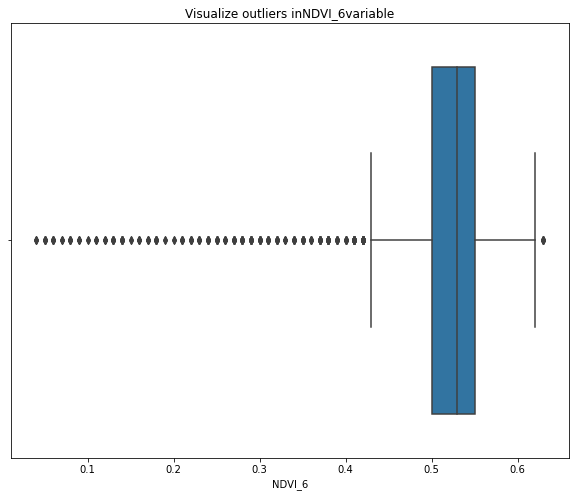

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


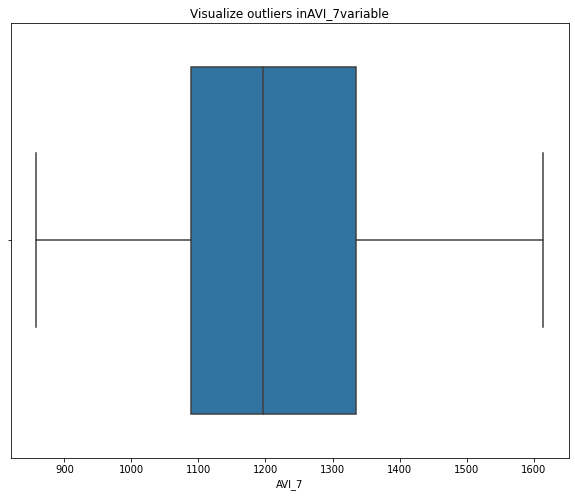

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


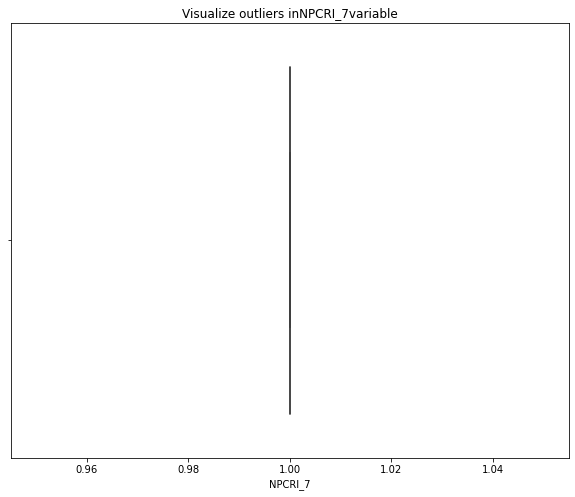

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


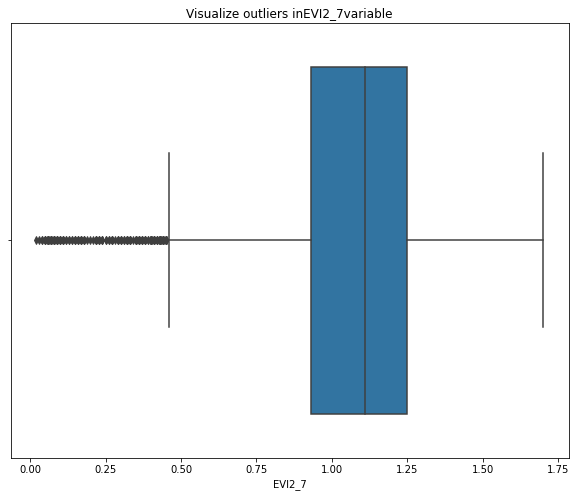

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


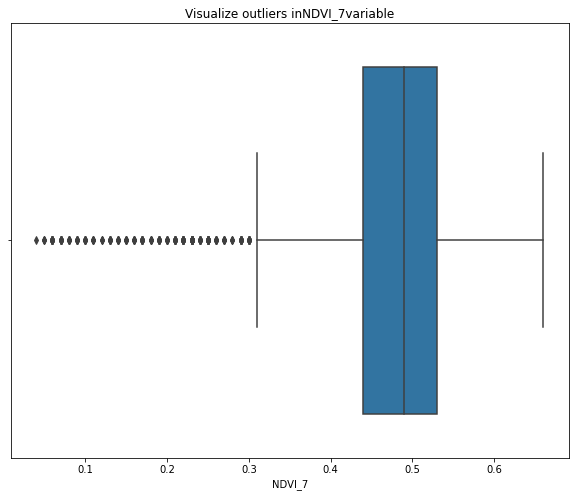

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


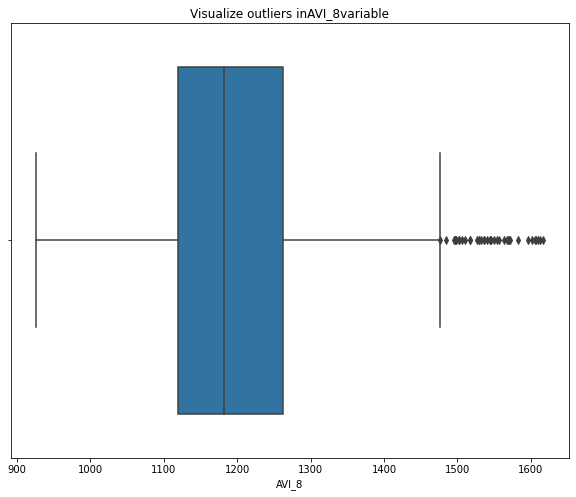

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


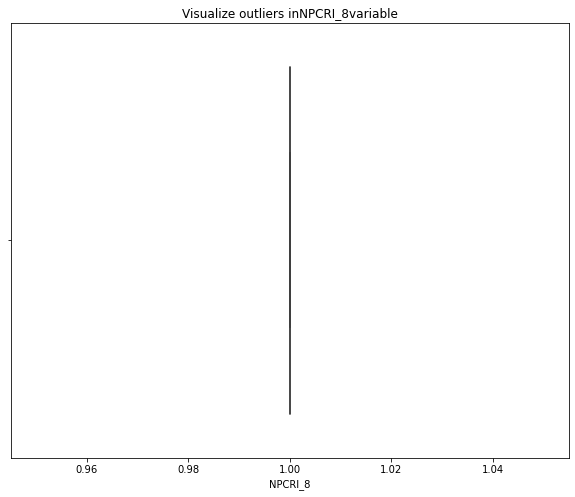

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


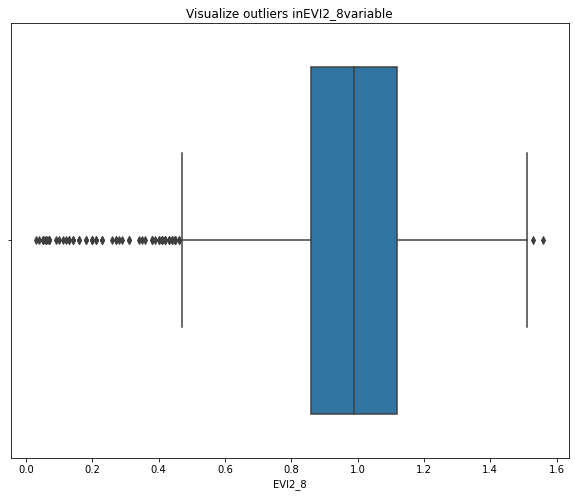

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


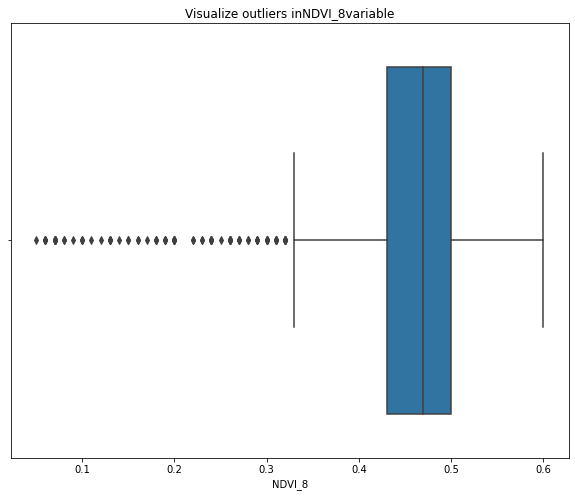

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


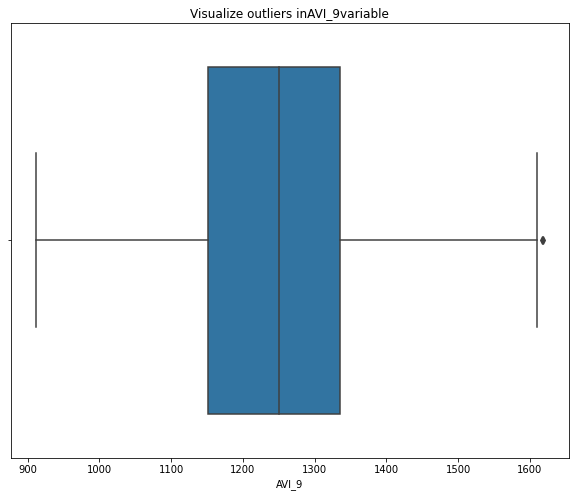

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


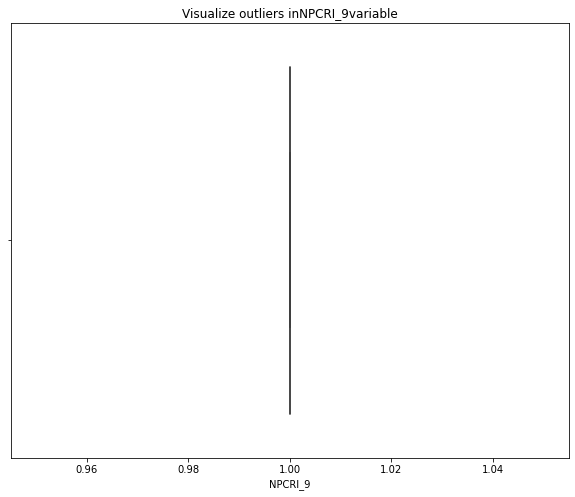

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


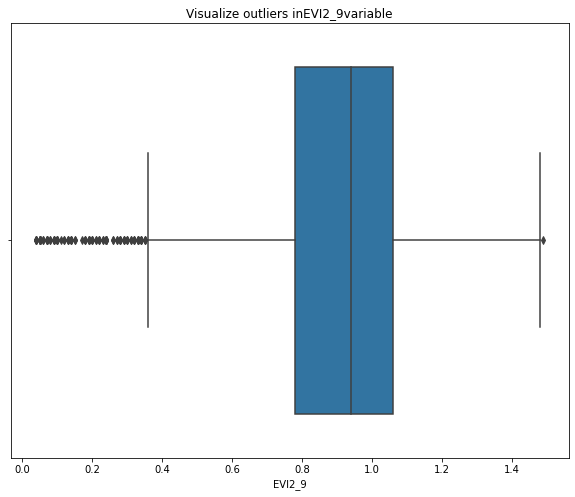

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


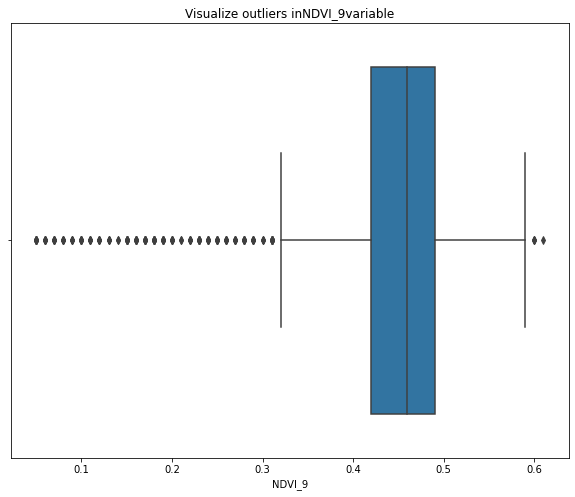

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


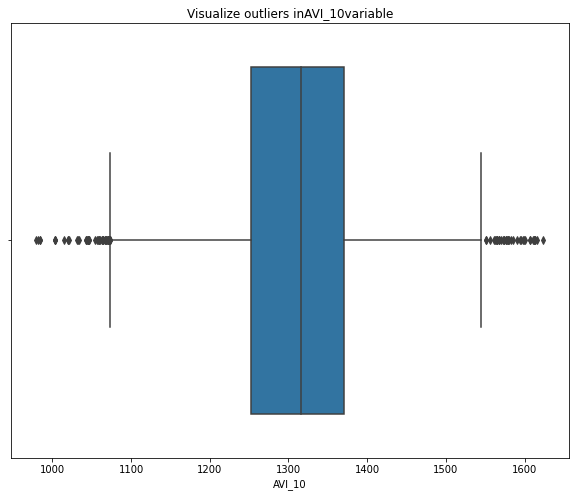

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


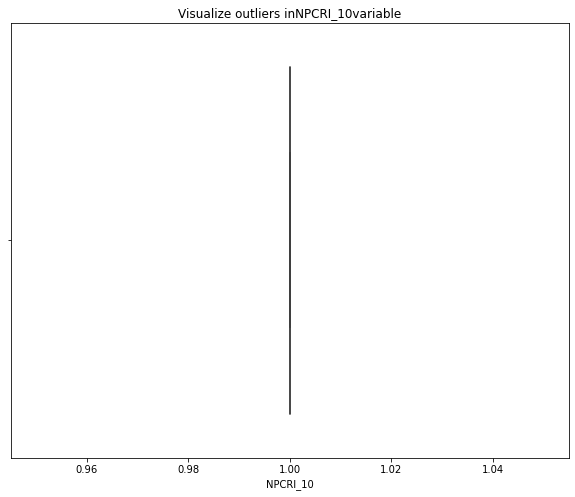

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


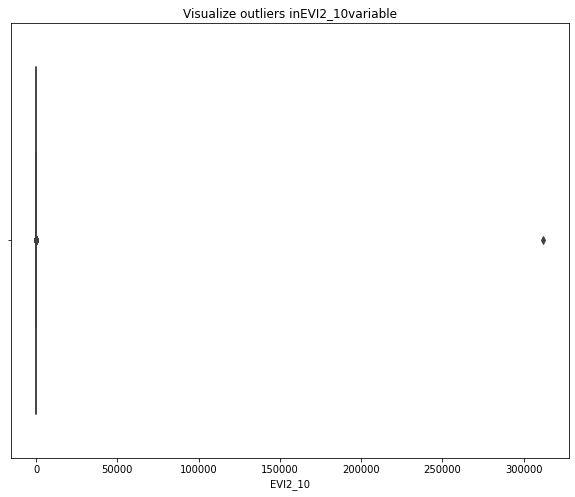

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


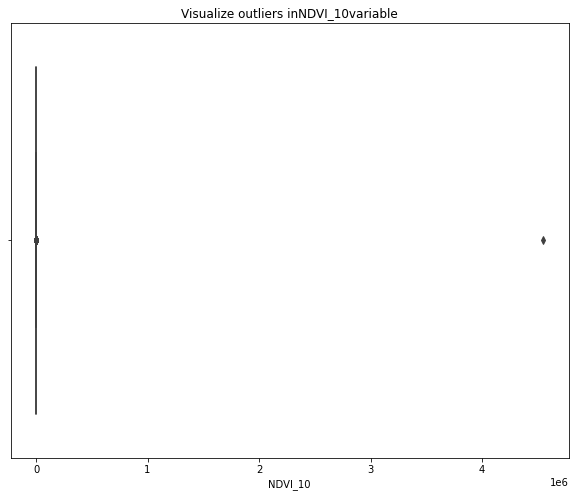

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


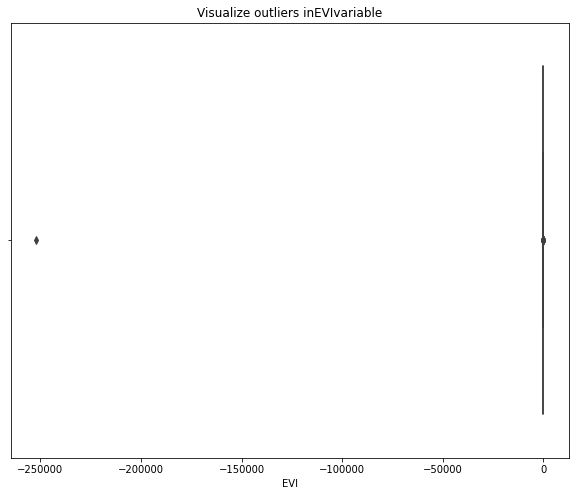

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


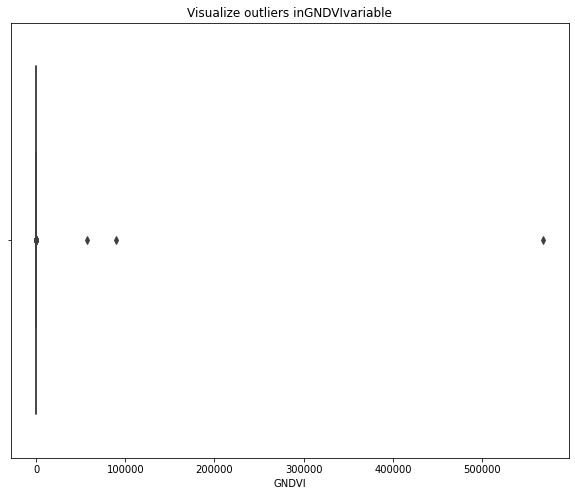

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


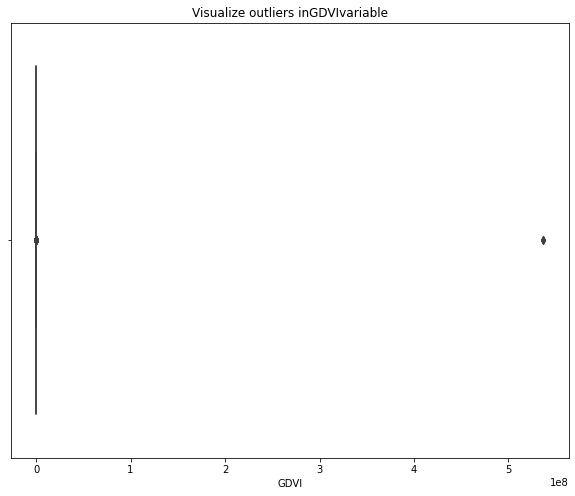

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


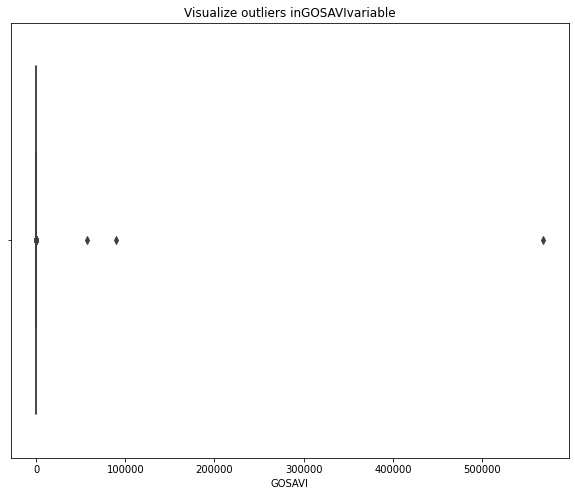

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


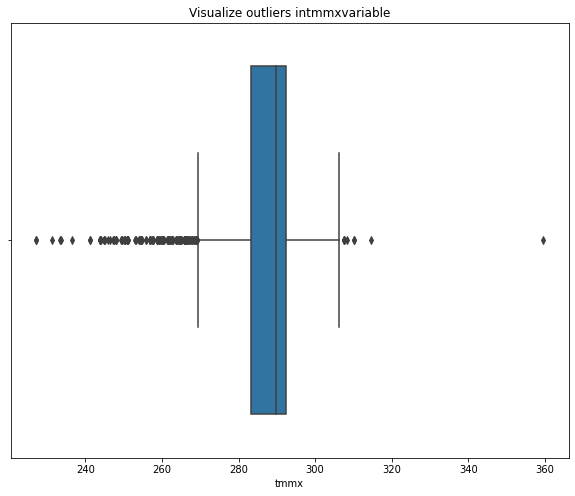

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


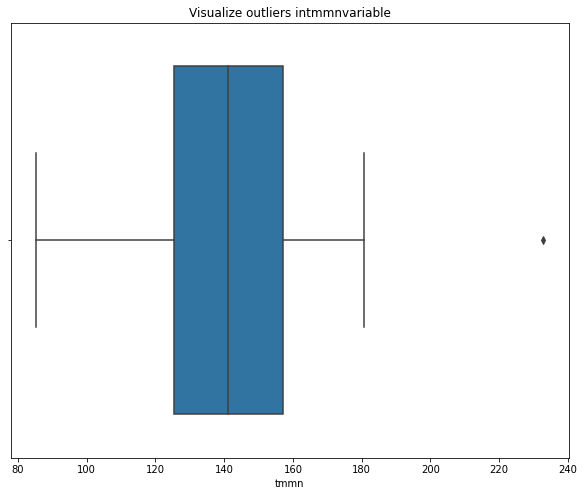

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


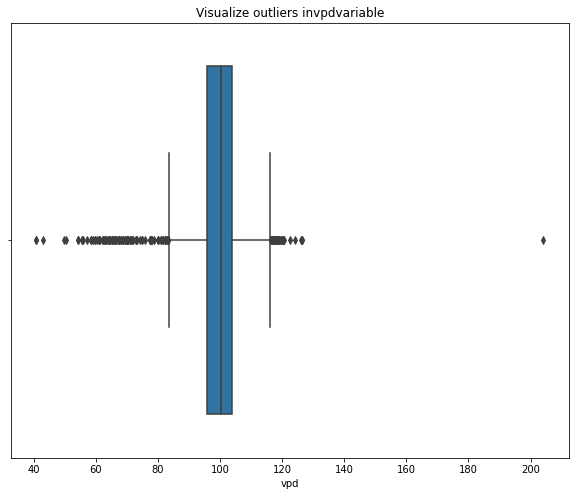

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


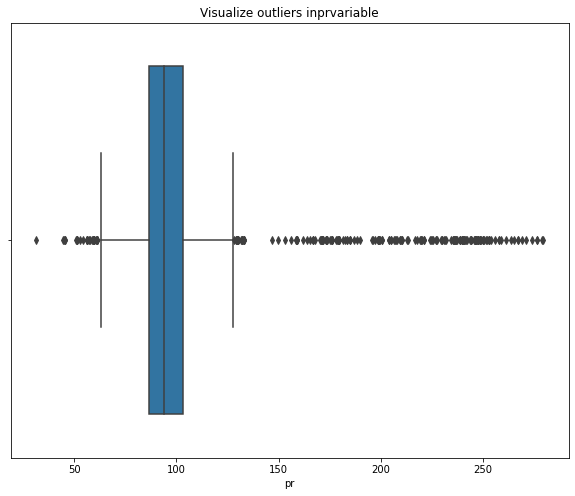

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


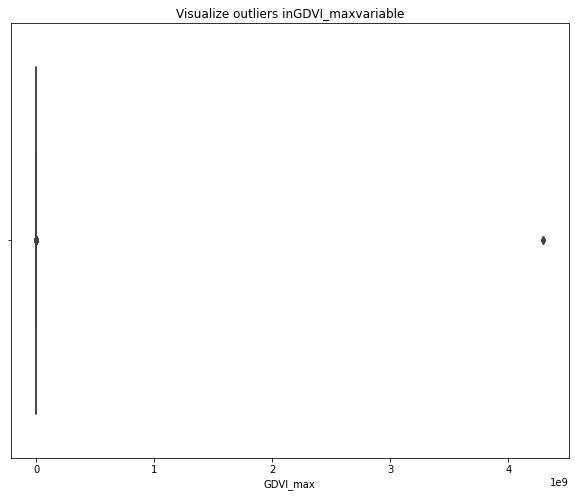

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


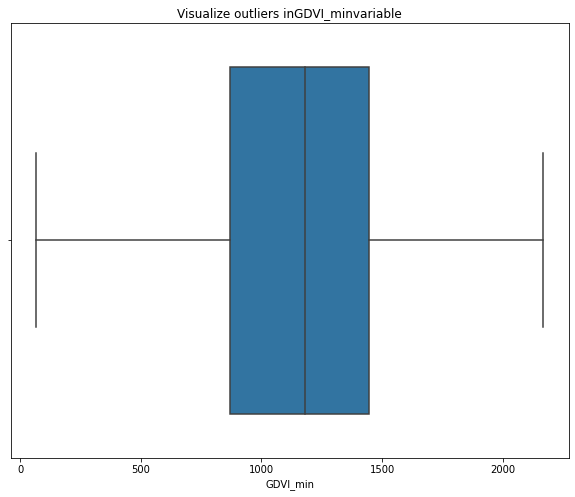

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


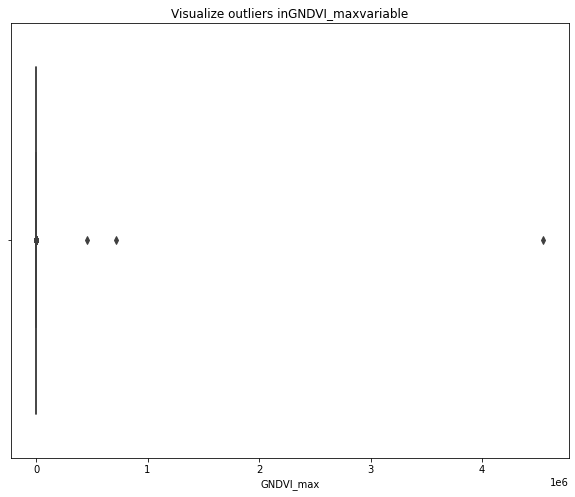

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


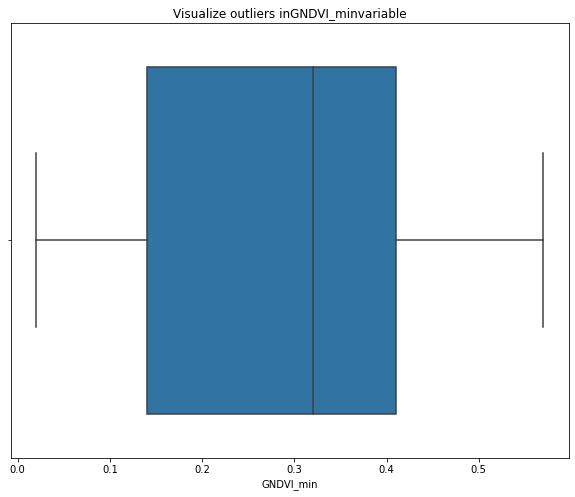

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


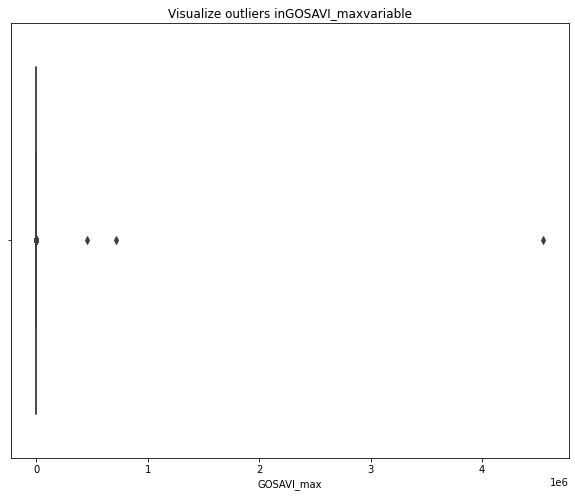

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


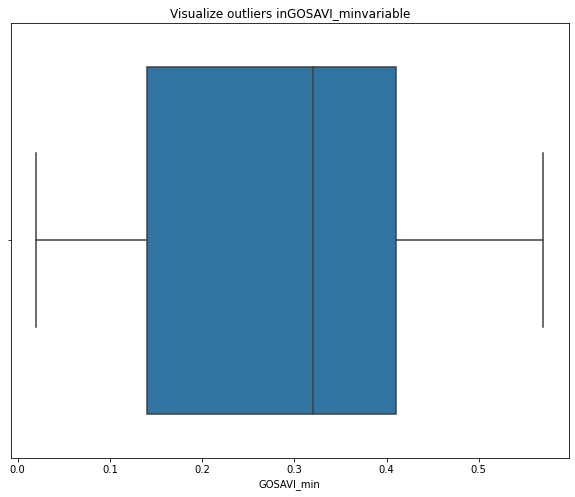

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


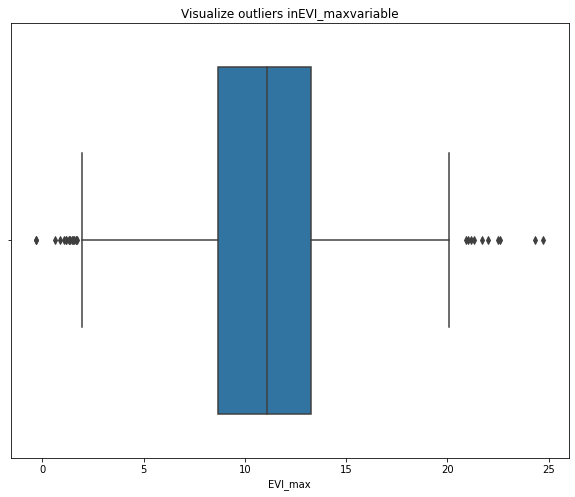

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


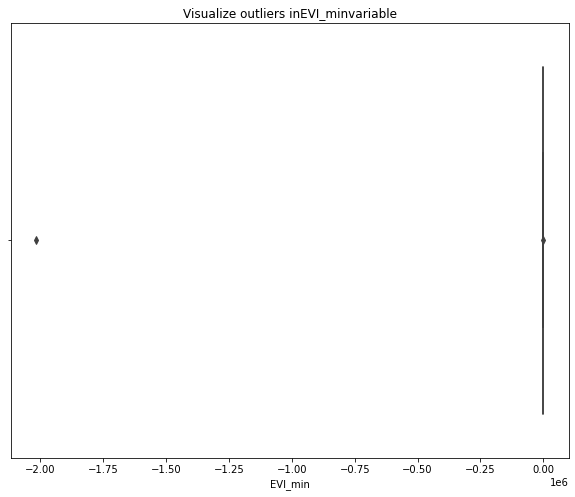

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


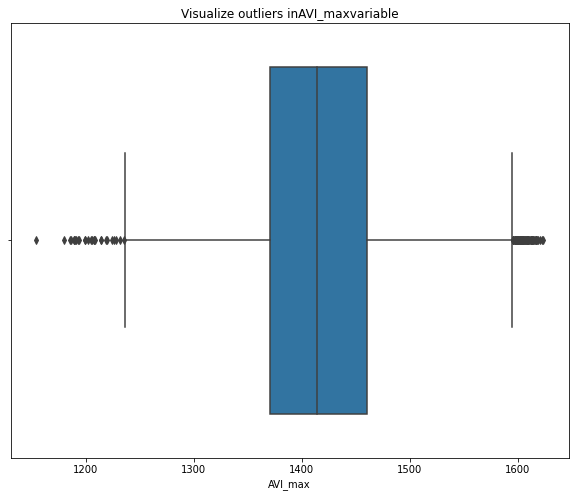

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


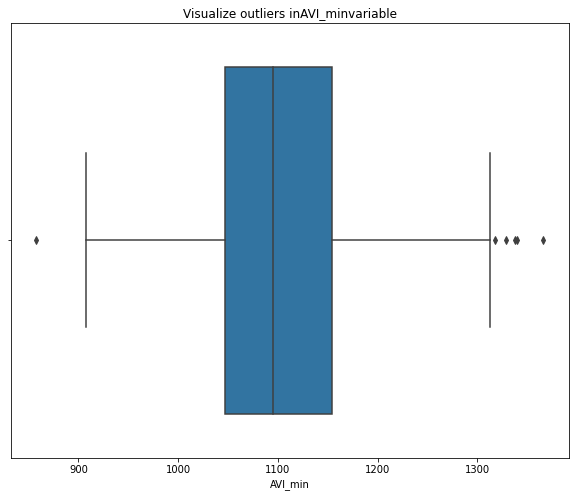

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


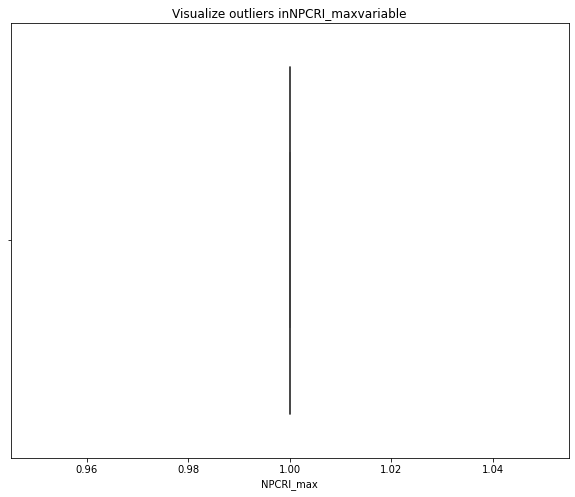

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


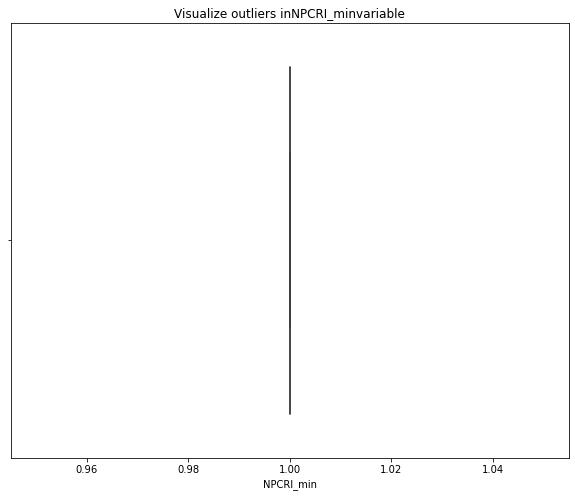

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


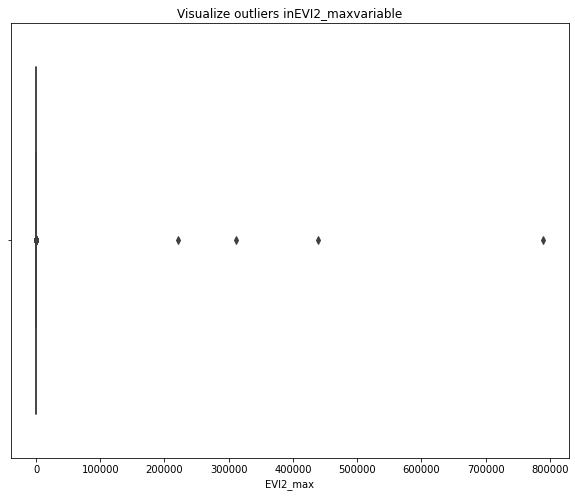

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


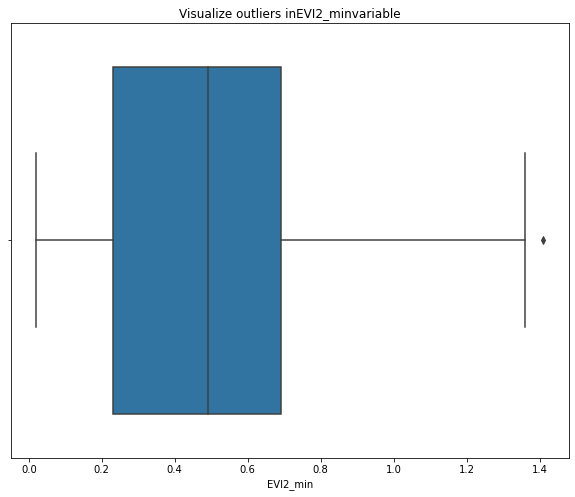

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


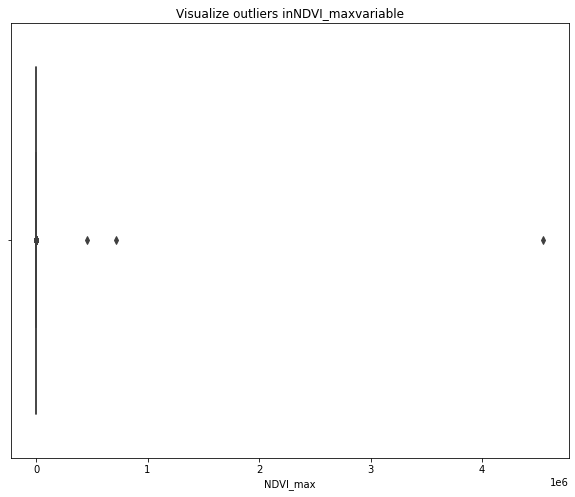

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


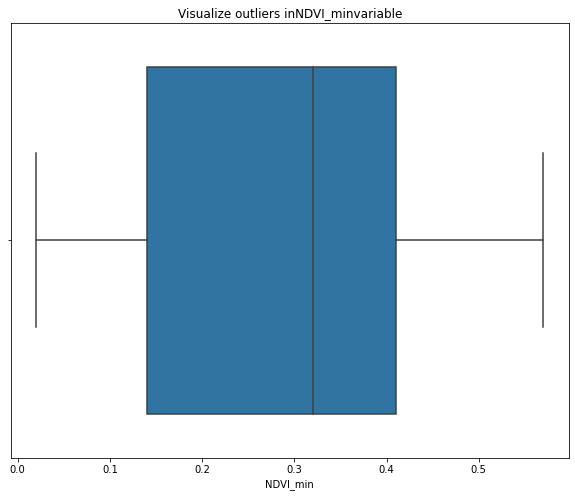

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


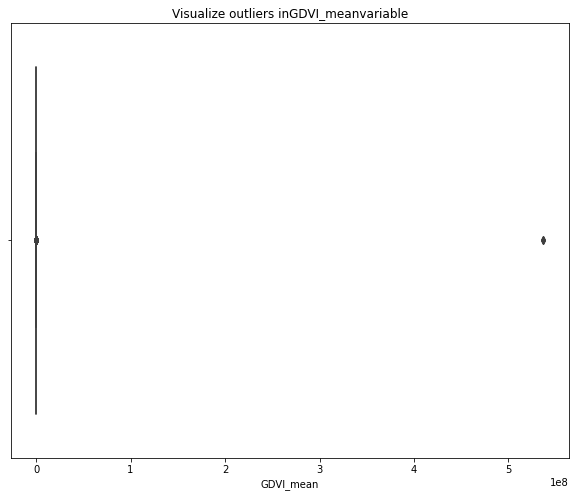

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


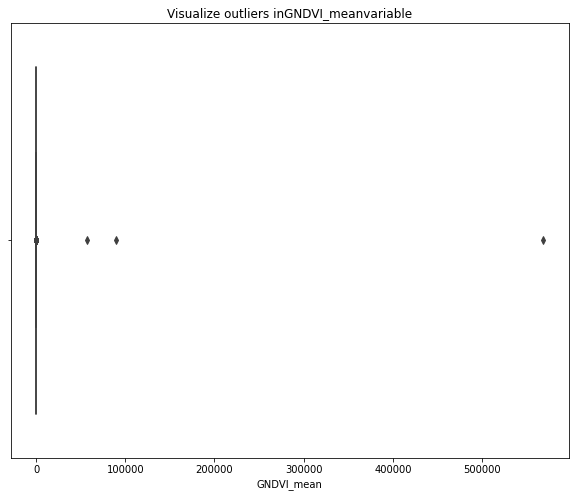

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


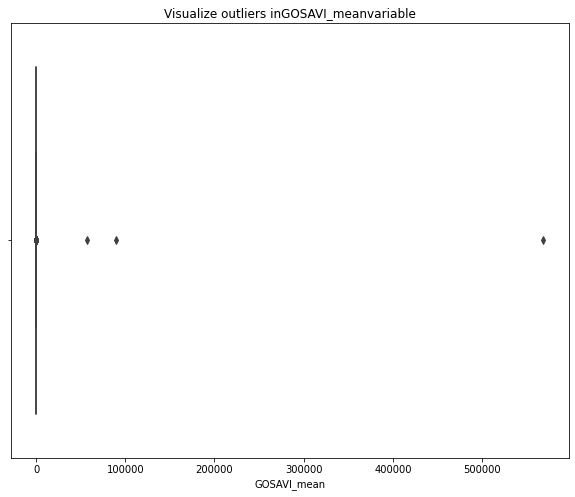

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


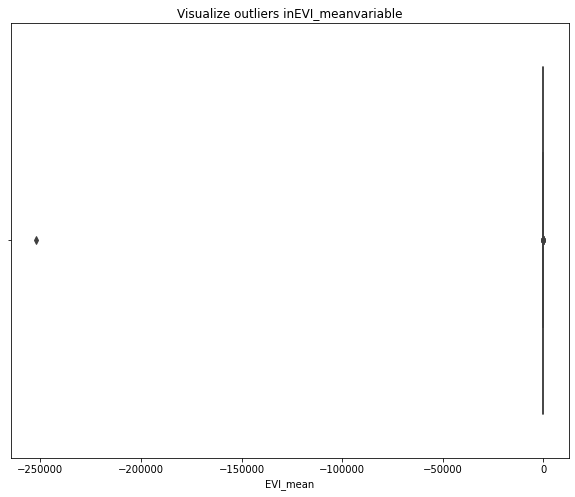

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


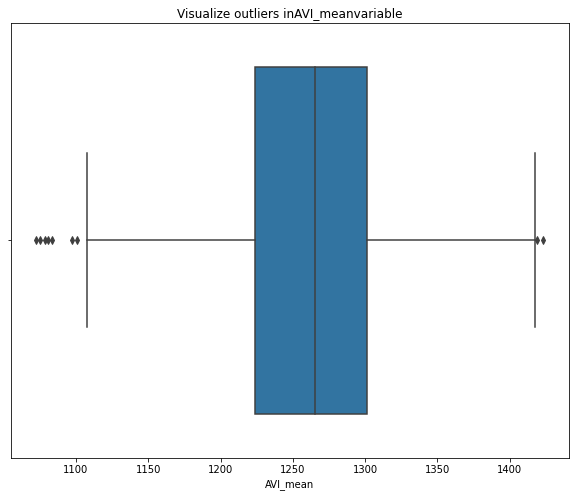

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


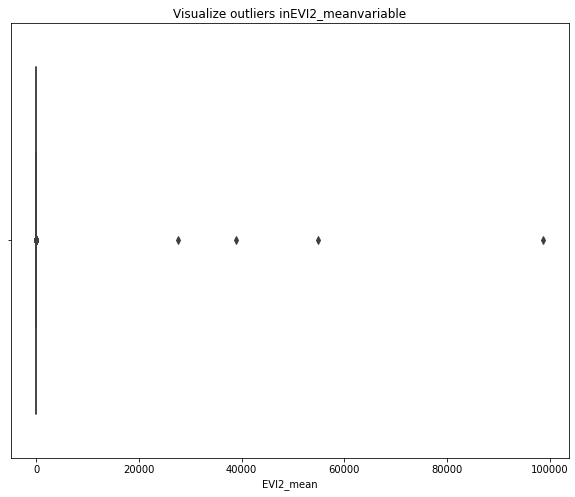

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


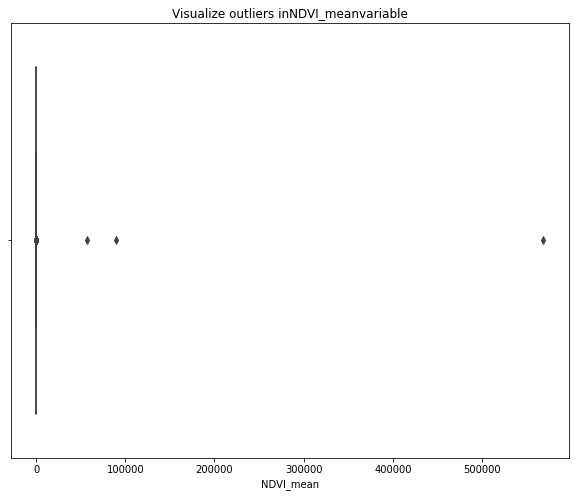

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


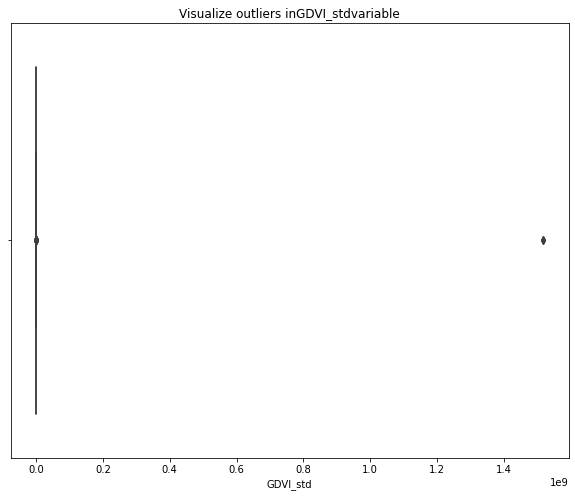

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


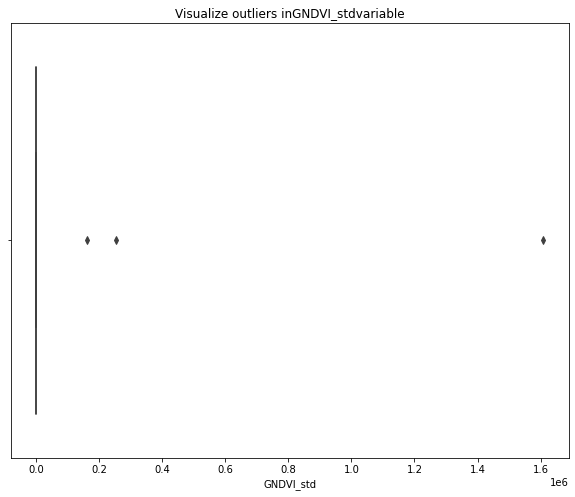

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


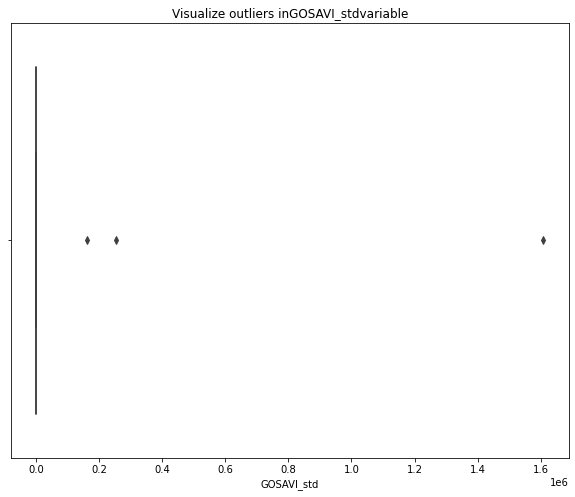

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


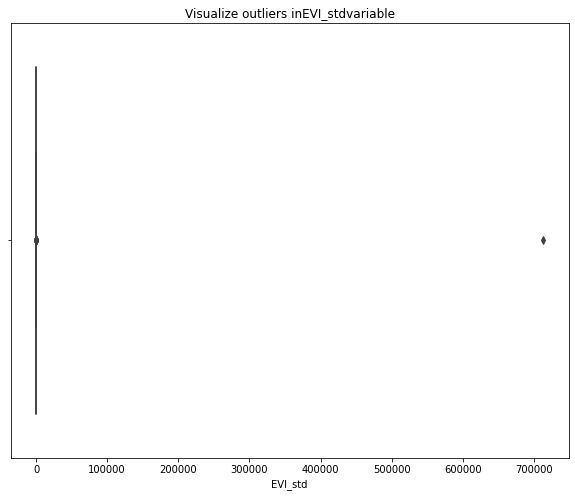

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


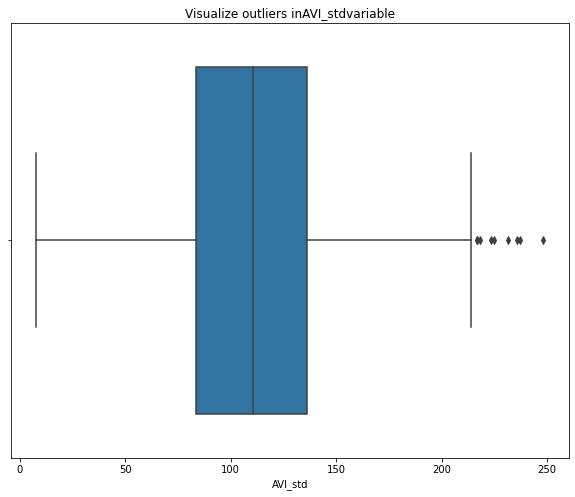

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


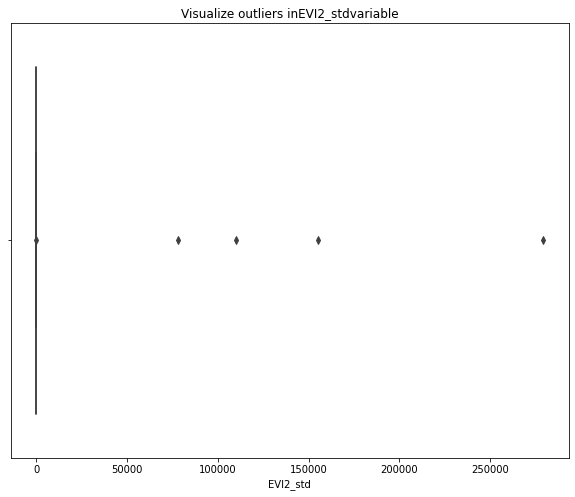

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


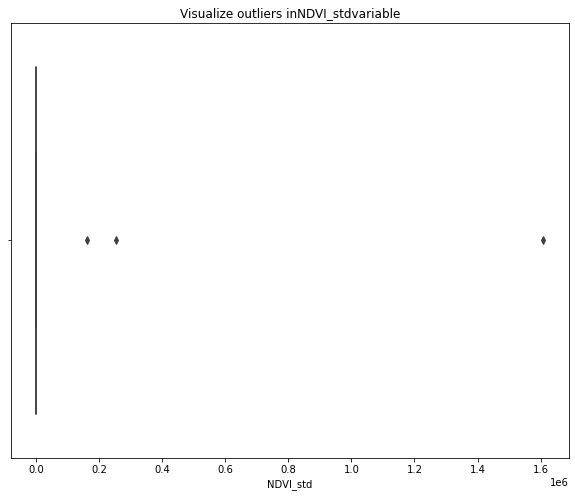

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


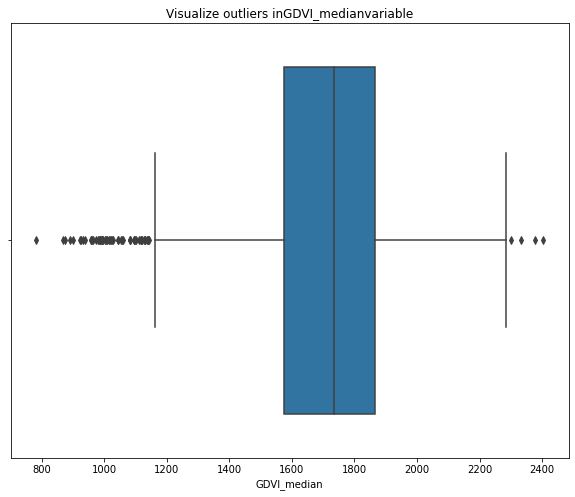

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


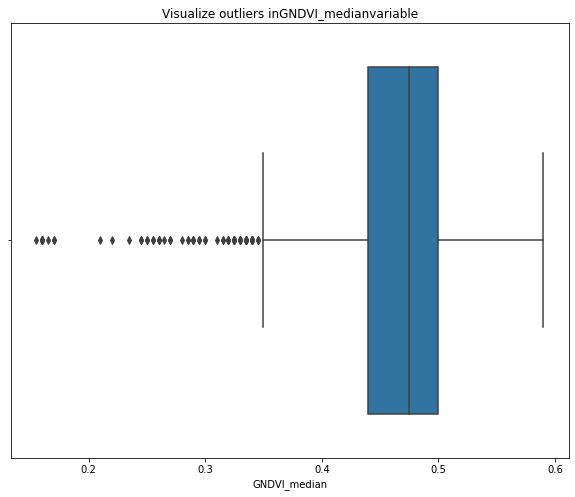

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


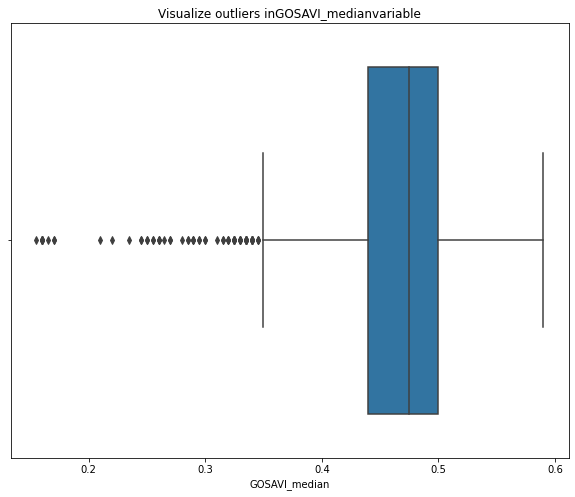

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


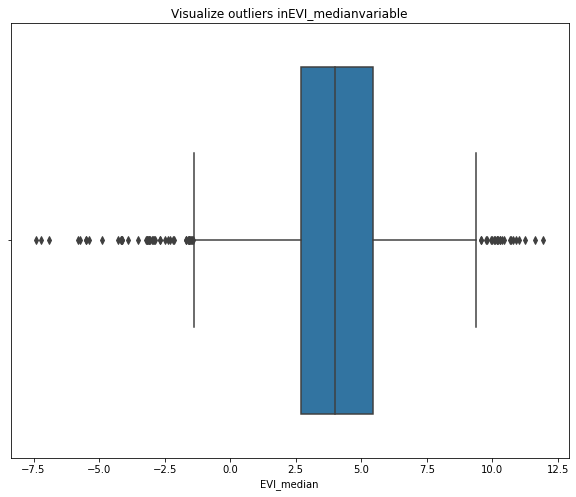

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


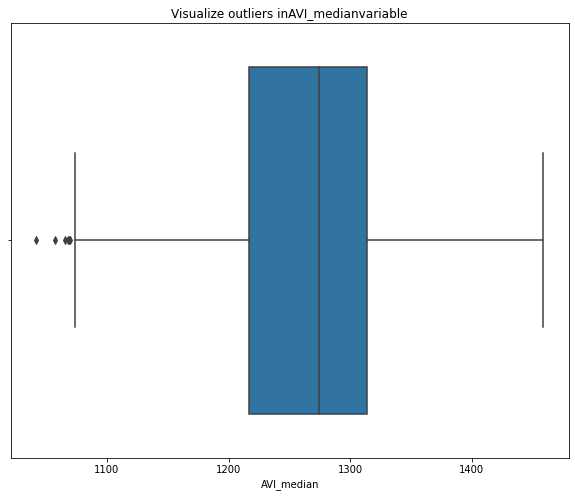

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


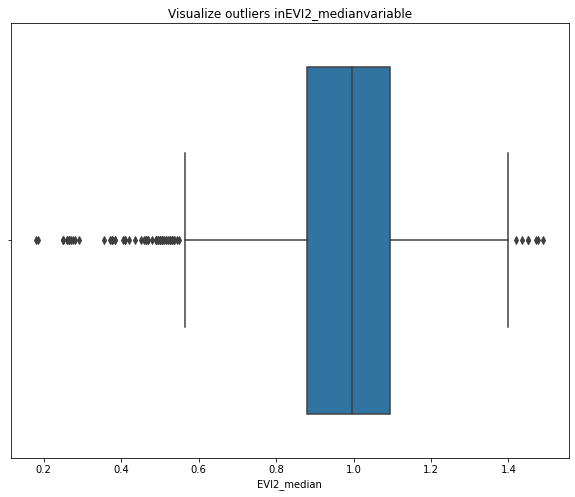

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


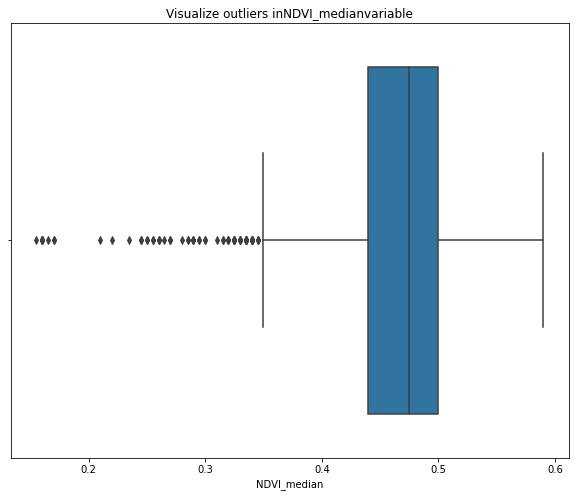

In [35]:
for col in cols:
    
    f, ax = plt.subplots(figsize=(10,8))
    x = df_maxmin_train[col]
    ax = sns.boxplot(x)
    ax.set_title('Visualize outliers in'+col +'variable')
    plt.show()

In [36]:
X_train.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,soil_sand_5-15cm_mean,soil_silt_5-15cm_mean,soil_soc_5-15cm_mean,AVI_3,EVI2_3,NDVI_3,AVI_4,EVI2_4,NDVI_4,AVI_5,EVI2_5,NDVI_5,AVI_6,EVI2_6,NDVI_6,AVI_7,EVI2_7,NDVI_7,AVI_8,EVI2_8,NDVI_8,AVI_9,EVI2_9,NDVI_9,AVI_10,EVI2_10,NDVI_10,EVI,GNDVI,GDVI,GOSAVI,tmmx,tmmn,vpd,pr,GDVI_max,GDVI_min,GNDVI_max,GNDVI_min,GOSAVI_max,GOSAVI_min,EVI_max,EVI_min,AVI_max,AVI_min,EVI2_max,EVI2_min,NDVI_max,NDVI_min,GDVI_mean,GNDVI_mean,GOSAVI_mean,EVI_mean,AVI_mean,EVI2_mean,NDVI_mean,GDVI_std,GNDVI_std,GOSAVI_std,EVI_std,AVI_std,EVI2_std,NDVI_std,GDVI_median,GNDVI_median,GOSAVI_median,EVI_median,AVI_median,EVI2_median,NDVI_median
soil_bdod_5-15cm_mean,1.0,-0.4138,-0.0187,0.04733,-0.447,-0.6043,-0.6662,-0.1236,0.355,-0.5188,-0.6469,0.05685,0.0286,0.02246,0.02164,-0.01979,-0.007756,0.2116,-0.01794,0.00519,0.1575,0.001836,0.06588,-0.04049,-0.1681,-0.0826,0.0298,-0.3049,-0.2081,0.1403,-0.1139,0.02045,0.1614,-0.02955,0.002516,-0.01621,0.006612,0.02023,0.006613,0.4276,0.7524,0.2106,-0.1743,0.02023,0.1192,0.006612,0.07335,0.006613,0.07334,-0.0003036,-0.01623,0.02819,0.005653,0.01771,0.02949,0.006612,0.07335,0.02023,0.006612,0.006613,-0.01621,0.1875,0.0177,0.006612,0.02023,0.006612,0.006613,0.01624,0.02851,0.01771,0.006612,-0.05174,-0.1967,-0.1966,0.02691,0.2305,-0.2603,-0.1967
soil_cec_5-15cm_mean,-0.4138,1.0,-0.09071,-0.2834,0.421,0.4495,0.509,0.6356,-0.1313,0.5038,0.2639,0.2017,-0.0198,-0.01811,0.1004,-0.2258,-0.1318,-0.04959,-0.03653,-0.0262,0.02671,-0.009123,-0.06119,0.2064,0.1278,0.05395,-0.001006,0.2907,0.1787,-0.1606,0.1506,0.02937,-0.1968,0.01502,-0.005074,0.01311,-0.008325,-0.01807,-0.008326,-0.6028,-0.6861,-0.4466,-0.06142,-0.01807,-0.2285,-0.008325,-0.1013,-0.008325,-0.1013,0.1484,0.0131,0.1017,0.015,-0.01399,-0.1441,-0.008325,-0.1013,-0.01807,-0.008325,-0.008326,0.01311,0.04637,-0.01399,-0.008325,-0.01807,-0.008325,-0.008325,-0.01308,0.05834,-0.01399,-0.008325,-0.0116,0.06442,0.06434,-0.01642,0.01595,0.1149,0.06442
soil_cfvo_5-15cm_mean,-0.0187,-0.09071,1.0,-0.1919,-0.363,-0.1681,-0.05876,0.01033,0.07166,0.1319,0.1016,0.002127,-0.02029,-0.02254,-0.05618,-0.002991,-0.001915,-0.06273,0.1432,0.1512,-0.006866,0.1098,0.1357,-0.09605,0.06507,0.08287,-0.0944,-0.01496,-0.0008677,-0.05851,0.06413,0.08644,0.04581,0.01906,-0.0358,0.01632,-0.03934,-0.03952,-0.03935,0.109,0.08429,0.04444,0.01268,-0.03952,0.1174,-0.03935,0.08117,-0.03935,0.08115,0.09098,0.01631,-0.09911,-0.06339,-0.01317,0.06314,-0.03935,0.08117,-0.03952,-0.03934,-0.03935,0.01632,-0.09165,-0.01317,-0.03934,-0.03952,-0.03935,-0.03935,-0.0163,-0.01846,-0.01317,-0.03935,0.09469,0.05573,0.05567,0.006646,-0.07949,0.04682,0.05573
soil_clay_5-15cm_mean,0.04733,-0.2834,-0.1919,1.0,-0.07,-0.334,-0.307,-0.1329,-0.6794,-0.2862,-0.3171,-0.09636,0.02812,0.0312,-0.007571,0.05583,0.05939,0.1203,-0.1938,-0.2012,-0.08877,-0.008411,-0.001,-0.03899,-0.1161,-0.1036,0.04786,-0.1617,-0.1239,0.09791,-0.1915,-0.1324,0.1509,-0.02458,0.06648,-0.02263,0.07109,0.06448,0.07109,0.3583,0.1449,0.2814,0.004114,0.06448,-0.05559,0.07109,-0.04048,0.07109,-0.04047,-0.1766,-0.02259,0.08303,-0.008898,0.01884,-0.04616,0.07109,-0.04048,0.06448,0.07109,0.07109,-0.02263,0.04139,0.01883,0.07109,0.06448,0.07109,0.07109,0.02257,0.04736,0.01884,0.07109,-0.1613,-0.1578,-0.1577,-0.06567,0.04467,-0.1834,-0.1578
soil_nitrogen_5-15cm_mean,-0.447,0.421,-0.363,-0.07,1.0,0.553,0.4878,0.1236,-0.1123,0.2287,0.4304,0.1151,-0.007684,-0.00461,0.1215,-0.001333,0.006502,0.02074,-0.1321,-0.1472,-0.08505,-0.1177,-0.186,0.1693,0.01375,-0.0464,0.129,0.2215,0.1282,-0.01691,0.01329,-0.08597,-0.2066,0.03311,0.01647,0.003307,0.01534,0.005653,0.01534,-0.5898,-0.5604,-0.3851,0.08554,0.005654,-0.209,0.01534,-0.1427,0.01534,-0.1427,-0.07611,0.003336,0.1098,0.1314,0.003245,-0.1195,0.01534,-0.1427,0.005653,0.01534,0.01534,0.003307,0.07354,0.003246,0.01534,0.005655,0.01534,0.01534,-0.003341,

# Feature Engineering And Selection

In [37]:
X_train.head()

,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,soil_sand_5-15cm_mean,soil_silt_5-15cm_mean,...,AVI_std,EVI2_std,NDVI_std,GDVI_median,GNDVI_median,GOSAVI_median,EVI_median,AVI_median,EVI2_median,NDVI_median
0,127.0,155.0,101.0,476.0,1273.0,292.0,54.0,53.0,328.0,196.0,...,48.324752,0.327411,0.157639,1218.5,0.335,0.335,1.565,1304.355,0.50,0.335
1,124.0,175.0,131.0,422.0,974.0,280.0,58.0,55.0,310.0,267.0,...,112.782694,0.259447,0.140706,1494.5,0.385,0.385,2.290,1286.305,0.65,0.385
2,128.0,134.0,82.0,445.0,1043.0,285.0,52.0,57.0,342.0,214.0,...,146.978727,0.297703,0.103199,1561.0,0.435,0.435,3.550,1377.495,0.85,0.435
3,124.0,124.0,85.0,391.0,1021.0,257.0,41.0,54.0,368.0,241.0,...,98.470389,0.277476,0.077414,1574.5,0.430,0.430,2.575,1326.600,0.84,0.430
4,120.0,167.0,120.0,431.0,978.0,287.0,62.0,54.0,310.0,259.0,...,44.056560,0.228395,0.114946,1432.5,0.390,0.390,2.545,1310.955,0.67,0.390


In [38]:
X_test.head()

,soil_bdod_5-15cm_mean,soil_cec_5-15cm_mean,soil_cfvo_5-15cm_mean,soil_clay_5-15cm_mean,soil_nitrogen_5-15cm_mean,soil_ocd_5-15cm_mean,soil_ocs_0-30cm_mean,soil_phh2o_5-15cm_mean,soil_sand_5-15cm_mean,soil_silt_5-15cm_mean,...,AVI_std,EVI2_std,NDVI_std,GDVI_median,GNDVI_median,GOSAVI_median,EVI_median,AVI_median,EVI2_median,NDVI_median
0,120.0,202.0,102.0,427.0,1258.0,274.0,49.0,56.0,306.0,267.0,...,112.997048,0.455122,0.171527,1683.5,0.470,0.470,4.355,1237.900,1.015,0.470
1,119.0,231.0,61.0,395.0,1459.0,306.0,56.0,55.0,283.0,322.0,...,84.474612,0.288630,0.080490,1761.5,0.440,0.440,4.945,1260.560,0.875,0.440
2,119.0,203.0,84.0,452.0,1453.0,295.0,57.0,55.0,285.0,264.0,...,114.794550,0.187464,0.040267,1681.5,0.465,0.465,5.095,1244.980,0.900,0.465
3,108.0,211.0,76.0,486.0,1977.0,376.0,67.0,54.0,217.0,297.0,...,99.566263,0.444578,0.171860,1703.0,0.495,0.495,6.550,1285.565,1.095,0.495
4,117.0,245.0,78.0,417.0,1230.0,291.0,57.0,56.0,283.0,299.0,...,153.845627,0.241509,0.092582,1522.5,0.435,0.435,5.690,1289.390,0.955,0.435


In [39]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train)

In [40]:
train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled = pd.DataFrame(train_scaled, index = X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(test_scaled, index= X_test.index, columns=X_test.columns)


[0.0022024  0.00957186 0.00538071 0.01552995 0.01310546 0.0070629
 0.0086325  0.00656349 0.01035058 0.01506955 0.00886151 0.00688149
 0.0070929  0.01087981 0.00875868 0.01436566 0.01021188 0.00820112
 0.01337562 0.00735479 0.00959621 0.01565649 0.02963431 0.01064961
 0.02069651 0.00955555 0.01294881 0.00863447 0.0075545  0.01004192
 0.01904288 0.00981095 0.01025502 0.02600412 0.00566333 0.00912302
 0.00698544 0.00988048 0.01156128 0.05825235 0.1225836  0.01836456
 0.02281774 0.00987493 0.00991993 0.01230941 0.01529632 0.
 0.         0.00917681 0.01169649 0.01128295 0.00892747 0.01317695
 0.01818044 0.         0.         0.         0.00991202 0.01967827
 0.01620114 0.01215379 0.03497779 0.         0.01356805 0.01107939
 0.01707258 0.01379648 0.01135541 0.00822115 0.         0.0102598
 0.01239249 0.         0.01227809 0.01423372 0.00821224 0.        ]


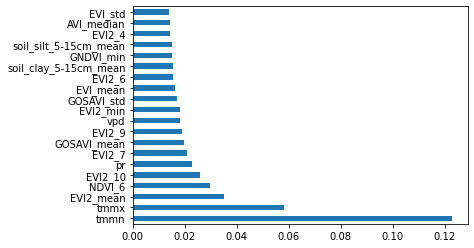

In [42]:
import xgboost as xgb

clf = xgb.XGBRegressor(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y)
print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [43]:
feat_importances.nlargest(20)

tmmn                     0.122584
tmmx                     0.058252
EVI2_mean                0.034978
NDVI_6                   0.029634
EVI2_10                  0.026004
pr                       0.022818
EVI2_7                   0.020697
GOSAVI_mean              0.019678
EVI2_9                   0.019043
vpd                      0.018365
EVI2_min                 0.018180
GOSAVI_std               0.017073
EVI_mean                 0.016201
EVI2_6                   0.015656
soil_clay_5-15cm_mean    0.015530
GNDVI_min                0.015296
soil_silt_5-15cm_mean    0.015070
EVI2_4                   0.014366
AVI_median               0.014234
EVI_std                  0.013796
dtype: float32

In [44]:
Selected_features = ['tmmn','tmmx',"EVI2_mean","NDVI_6","EVI2_10","pr","EVI2_7","GOSAVI_mean","EVI2_9","vpd","EVI2_min"
                     ,"GOSAVI_std","EVI_mean","EVI2_6","GNDVI_min","soil_clay_5-15cm_mean","soil_silt_5-15cm_mean","EVI2_4","AVI_median","EVI_std"]
X_train_selected = X_train_scaled[Selected_features].copy()
X_test_selected = X_test_scaled[Selected_features].copy()

In [45]:
X_train_selected.head()

,tmmn,tmmx,EVI2_mean,NDVI_6,EVI2_10,pr,EVI2_7,GOSAVI_mean,EVI2_9,vpd,EVI2_min,GOSAVI_std,EVI_mean,EVI2_6,GNDVI_min,soil_clay_5-15cm_mean,soil_silt_5-15cm_mean,EVI2_4,AVI_median,EVI_std
0,0.850394,0.094054,-2.414634,-2.0,-3.592593,-0.256318,-2.28125,-2.216667,-1.142857,-0.395152,-0.978261,0.930249,-0.751908,-2.30,-1.037037,0.66,-1.702703,-1.488889,0.305989,-1.178132
1,0.212598,0.229189,-2.024390,-1.4,-0.925926,0.164862,-2.21875,-1.933333,-0.964286,0.166061,-0.673913,0.715831,-0.708397,-1.80,-0.666667,-0.42,0.216216,-1.177778,0.120089,-1.105715
2,0.736378,0.445405,-0.646341,-0.2,-0.185185,0.120337,-0.68750,-0.683333,-0.464286,0.210909,-0.108696,0.240877,0.009924,-0.35,-0.222222,0.04,-1.216216,-0.222222,1.059272,-0.128704
3,0.736378,0.445405,-0.615854,-0.2,-0.333333,0.120337,-1.62500,-0.416667,-0.607143,0.210909,-0.043478,-0.085641,-0.146947,-0.40,0.074074,-1.04,-0.486486,0.377778,0.535094,0.058352
4,0.212598,0.229189,-2.030488,-2.0,-1.074074,0.164862,-2.18750,-1.866667,-1.035714,0.166061,-0.586957,0.389626,-0.678626,-2.20,-0.666667,-0.24,0.000000,-1.155556,0.373964,-1.069827


# XGBoost

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [47]:
best_regressor = xgb.XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, eta=0.5,
             eval_metric='rmse', gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.5,
             max_delta_step=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=4, nthread=-1,
             num_parallel_tree=None, random_state=162, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, tree_method=None,
             validate_parameters=1, verbosity=None)

In [48]:
kf = KFold(n_splits =9,shuffle=True,random_state=160)
feats = pd.DataFrame({'features': X_train_selected.columns}) 
gbm_predictions = []
cv_score_ = 0
oof_preds = np.zeros((df_mean_train.shape[0],))


for i,(tr_index,test_index) in enumerate(kf.split(X_train_selected,y)):
  
    print()
    print(f'######### FOLD {i+1} / {kf.n_splits} ')
    X_train,y_train = X_train_selected.iloc[tr_index,:],y[tr_index]
    X_test,y_test = X_train_selected.iloc[test_index,:],y[test_index]
  
  
    gbm = best_regressor
 
    gbm.fit(X_train,y_train,eval_set = [(X_test, y_test)],early_stopping_rounds  = 200,verbose=100)
  
    cv_score_ += mean_squared_error(y_test, gbm.predict(X_test), squared=False) / kf.n_splits
    oof_preds[test_index] = gbm.predict(X_test)
  
    preds = gbm.predict(X_test_selected[X_train_selected.columns])
    print(X_test_selected[X_train_selected.columns].shape)
    gbm_predictions.append(preds)

#     feats[f'Fold {i}'] = gbm.feature_importances_

feats['Importances'] = feats.mean(axis=1)
print( ' CV RMSE : ',cv_score_)
preds_xgb = np.average(gbm_predictions, axis=0)
print(preds_xgb.shape)


######### FOLD 1 / 9 
[0]	validation_0-rmse:1.95671
[100]	validation_0-rmse:1.55943
[200]	validation_0-rmse:1.55883
[300]	validation_0-rmse:1.55878
[400]	validation_0-rmse:1.55877
[499]	validation_0-rmse:1.55877
(1055, 20)

######### FOLD 2 / 9 
[0]	validation_0-rmse:2.01207
[100]	validation_0-rmse:1.61573
[200]	validation_0-rmse:1.61588
[234]	validation_0-rmse:1.61588
(1055, 20)

######### FOLD 3 / 9 
[0]	validation_0-rmse:1.97136
[100]	validation_0-rmse:1.66976
[200]	validation_0-rmse:1.66910
[203]	validation_0-rmse:1.66910
(1055, 20)

######### FOLD 4 / 9 
[0]	validation_0-rmse:1.90690
[100]	validation_0-rmse:1.46254
[200]	validation_0-rmse:1.46402
[222]	validation_0-rmse:1.46418
(1055, 20)

######### FOLD 5 / 9 
[0]	validation_0-rmse:2.04352
[100]	validation_0-rmse:1.54661
[200]	validation_0-rmse:1.54574
[300]	validation_0-rmse:1.54565
[400]	validation_0-rmse:1.54562
[499]	validation_0-rmse:1.54561
(1055, 20)

######### FOLD 6 / 9 
[0]	validation_0-rmse:1.92950
[100]	validation_0-

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [49]:
predictionsdf = pd.DataFrame()

predictionsdf["id"] = Field_ID
predictionsdf["Yield"] = preds_xgb



predictionsdf.to_csv('submission_gb.csv', index=False, header=predictionsdf.columns)